In [725]:
import pandas as pd
import seaborn as sns
import numpy as np

In [726]:
df = pd.read_csv("/content/Amazon_weekly.csv")


In [727]:
df['Date'] = pd.to_datetime(df['Date'])

In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1399 non-null   datetime64[ns]
 1   Open    1399 non-null   float64       
 2   High    1399 non-null   float64       
 3   Low     1399 non-null   float64       
 4   Close   1399 non-null   float64       
 5   Volume  1399 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 65.7 KB


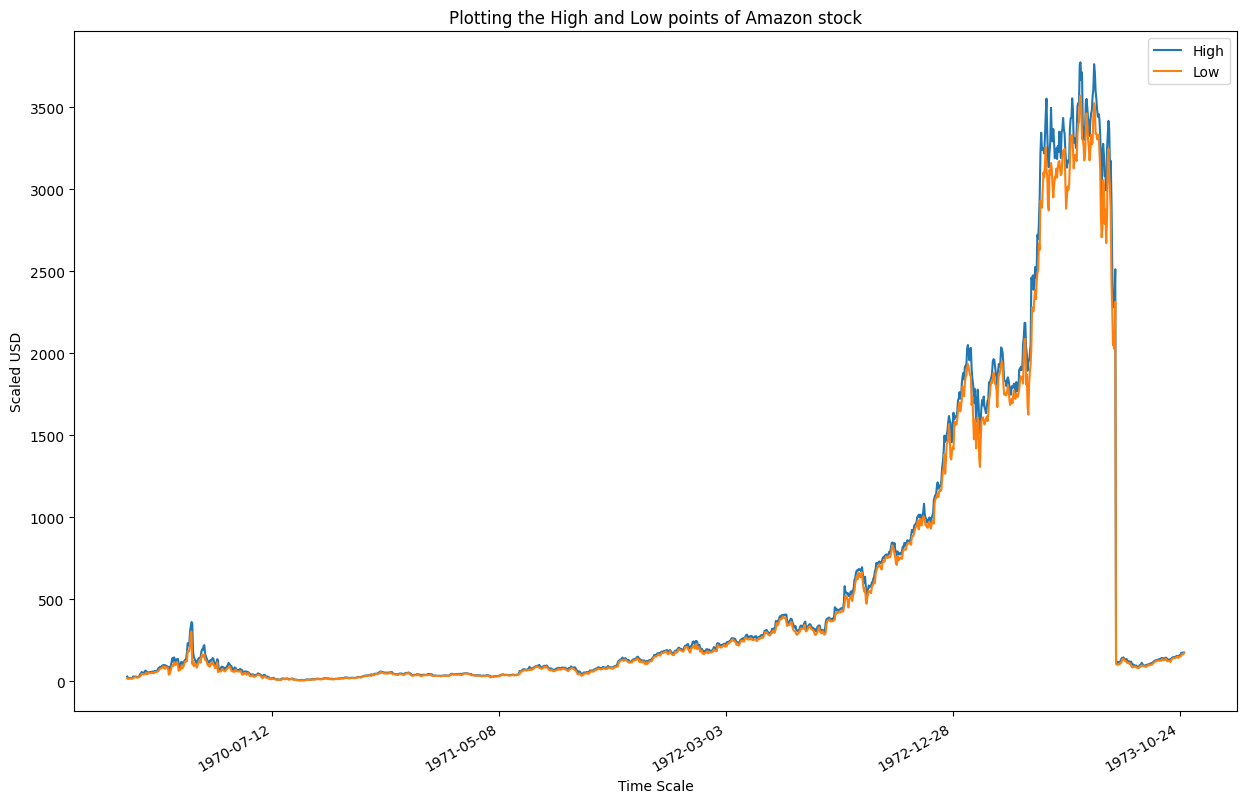

In [729]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

plt.figure(figsize=(15, 10))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=300))

# Plotting
plt.plot(df.index, df['High'], label='High')
plt.plot(df.index, df['Low'], label='Low')

plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.title('Plotting the High and Low points of Amazon stock')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


In [730]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1997-05-18,18.000,30.00,18.000,1.7292,7238000
1,1997-05-25,21.125,21.25,15.750,1.5000,4836500
2,1997-06-01,18.125,19.75,17.500,1.5000,1611600
3,1997-06-08,18.125,20.50,16.500,1.6563,1527900
4,1997-06-15,19.875,20.50,18.375,1.5834,943700


In [731]:
df.drop(["Volume"], axis = 1, inplace =True)

In [732]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1399 non-null   datetime64[ns]
 1   Open    1399 non-null   float64       
 2   High    1399 non-null   float64       
 3   Low     1399 non-null   float64       
 4   Close   1399 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 54.8 KB


In [734]:
df.describe()

,Date,Open,High,Low,Close
count,1399,1399.000000,1399.000000,1399.000000,1399.000000
mean,2010-10-10 00:00:00,554.660358,573.510226,538.014765,550.467485
min,1997-05-18 00:00:00,5.910000,7.660000,5.510000,1.489600
25%,2004-01-28 12:00:00,47.286250,49.925000,44.577500,41.107500
50%,2010-10-10 00:00:00,127.860000,133.312500,120.760000,119.320000
75%,2017-06-21 12:00:00,528.980000,543.845000,512.360000,530.480000
max,2024-03-03 00:00:00,3744.000000,3773.078100,3570.455100,3719.340100
std,NaN,902.674982,931.460235,877.419438,907.408618


In [735]:
#sma and ema
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

#weekly change
delta = df['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)

# average gain and loss
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

# rs and rsi
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()

df['MACD'] = exp1 - exp2
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

df.head(30)


,Date,Open,High,Low,Close,SMA_20,EMA_20,RSI,MACD,Signal_Line
0,1997-05-18,18.000,30.0000,18.0000,1.7292,NaN,1.729200,NaN,0.000000,0.000000
1,1997-05-25,21.125,21.2500,15.7500,1.5000,NaN,1.707371,NaN,-0.018284,-0.003657
2,1997-06-01,18.125,19.7500,17.5000,1.5000,NaN,1.687622,NaN,-0.032400,-0.009405
3,1997-06-08,18.125,20.5000,16.5000,1.6563,NaN,1.684639,NaN,-0.030623,-0.013649
4,1997-06-15,19.875,20.5000,18.3750,1.5834,NaN,1.674997,NaN,-0.034696,-0.017858
5,1997-06-22,19.250,19.2500,17.9375,1.5261,NaN,1.660816,NaN,-0.042063,-0.022699
6,1997-06-29,18.500,18.5000,17.7500,1.4896,NaN,1.644510,NaN,-0.050268,-0.028213
7,1997-07-06,18.125,23.0000,17.7500,1.9115,NaN,1.669938,NaN,-0.022467,-0.027064
8,1997-07-13,22.000,30.8750,22.0000,2.2917,NaN,1.729153,NaN,0.029900,-0.015671
9,1997-07-20,27.875,29.9375,25.3750,2.1563,NaN,1.769834,NaN,0.059786,-0.000580


In [736]:
mean_SMA_20 = df['SMA_20'].mean()
mean_RSI = df['RSI'].mean()

df['SMA_20'].fillna(mean_SMA_20, inplace=True)
df['RSI'].fillna(mean_RSI, inplace = True)
print(df)

           Date     Open    High      Low     Close      SMA_20      EMA_20  \
0    1997-05-18   18.000   30.00   18.000    1.7292  556.925481    1.729200   
1    1997-05-25   21.125   21.25   15.750    1.5000  556.925481    1.707371   
2    1997-06-01   18.125   19.75   17.500    1.5000  556.925481    1.687622   
3    1997-06-08   18.125   20.50   16.500    1.6563  556.925481    1.684639   
4    1997-06-15   19.875   20.50   18.375    1.5834  556.925481    1.674997   
...         ...      ...     ...      ...       ...         ...         ...   
1394 2024-02-04  159.340  172.50  154.810  171.8100  143.844500  147.684532   
1395 2024-02-11  170.200  175.00  167.650  174.4500  146.111000  150.233624   
1396 2024-02-18  174.800  175.39  165.750  169.5100  148.230500  152.069470   
1397 2024-02-25  167.830  175.75  165.740  174.9900  150.582000  154.252377   
1398 2024-03-03  175.700  176.37  174.260  174.7300  152.829000  156.202627   

            RSI      MACD  Signal_Line  
0     56.6

In [737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1399 non-null   datetime64[ns]
 1   Open         1399 non-null   float64       
 2   High         1399 non-null   float64       
 3   Low          1399 non-null   float64       
 4   Close        1399 non-null   float64       
 5   SMA_20       1399 non-null   float64       
 6   EMA_20       1399 non-null   float64       
 7   RSI          1399 non-null   float64       
 8   MACD         1399 non-null   float64       
 9   Signal_Line  1399 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 109.4 KB


In [738]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
SMA_20         0
EMA_20         0
RSI            0
MACD           0
Signal_Line    0
dtype: int64

In [739]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
!pip install xgboost
from xgboost import XGBRegressor

In [740]:
data = df[['Open', 'High', 'Low', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Close']].values
print(data)

[[ 1.80000000e+01  3.00000000e+01  1.80000000e+01 ...  5.66024153e+01
   0.00000000e+00  1.72920000e+00]
 [ 2.11250000e+01  2.12500000e+01  1.57500000e+01 ...  5.66024153e+01
  -1.82837607e-02  1.50000000e+00]
 [ 1.81250000e+01  1.97500000e+01  1.75000000e+01 ...  5.66024153e+01
  -3.24002825e-02  1.50000000e+00]
 ...
 [ 1.74800000e+02  1.75390000e+02  1.65750000e+02 ...  7.48610845e+01
   7.48450287e+00  1.69510000e+02]
 [ 1.67830000e+02  1.75750000e+02  1.65740000e+02 ...  7.65923283e+01
   8.26947401e+00  1.74990000e+02]
 [ 1.75700000e+02  1.76370000e+02  1.74260000e+02 ...  7.55616438e+01
   8.76950013e+00  1.74730000e+02]]


<Axes: >

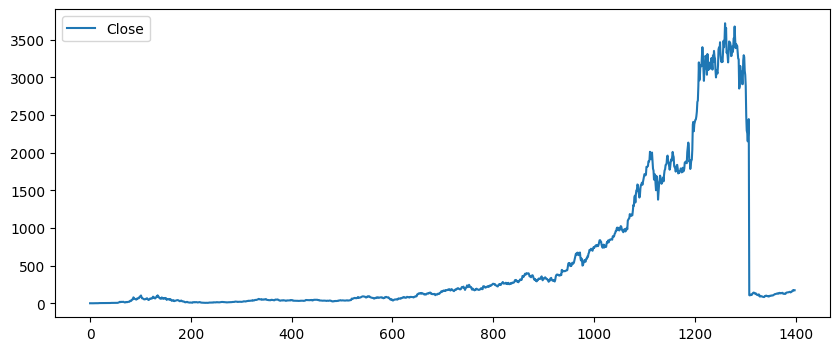

In [741]:
# a historical view of the closing price
df['Close'].plot(legend=True, figsize=(10,4))

In [742]:
# split data
X = data[:, :-1]
y = data[:, -1]
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

### AMAZON

## LSTM

In [743]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
lstm = Sequential()
lstm.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error')

# training the model
lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, shuffle=False)

# evaluating the model
loss = lstm.evaluate(X_test, y_test)
print("Test Loss:", loss)

y_pred_scaled = lstm.predict(X_test)

# Converting the scaled values back
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_lstm = sc_y.inverse_transform(y_pred_scaled).flatten()

Epoch 1/100
35/35 - 2s - loss: 0.0048 - 2s/epoch - 56ms/step
Epoch 2/100
35/35 - 0s - loss: 0.0075 - 84ms/epoch - 2ms/step
Epoch 3/100
35/35 - 0s - loss: 0.0029 - 78ms/epoch - 2ms/step
Epoch 4/100
35/35 - 0s - loss: 0.0016 - 80ms/epoch - 2ms/step
Epoch 5/100
35/35 - 0s - loss: 6.2618e-04 - 78ms/epoch - 2ms/step
Epoch 6/100
35/35 - 0s - loss: 1.9340e-04 - 82ms/epoch - 2ms/step
Epoch 7/100
35/35 - 0s - loss: 7.7303e-05 - 78ms/epoch - 2ms/step
Epoch 8/100
35/35 - 0s - loss: 6.7377e-05 - 77ms/epoch - 2ms/step
Epoch 9/100
35/35 - 0s - loss: 7.0096e-05 - 84ms/epoch - 2ms/step
Epoch 10/100
35/35 - 0s - loss: 7.1462e-05 - 81ms/epoch - 2ms/step
Epoch 11/100
35/35 - 0s - loss: 7.1590e-05 - 77ms/epoch - 2ms/step
Epoch 12/100
35/35 - 0s - loss: 7.1599e-05 - 81ms/epoch - 2ms/step
Epoch 13/100
35/35 - 0s - loss: 7.2078e-05 - 80ms/epoch - 2ms/step
Epoch 14/100
35/35 - 0s - loss: 7.2886e-05 - 82ms/epoch - 2ms/step
Epoch 15/100
35/35 - 0s - loss: 7.3794e-05 - 83ms/epoch - 2ms/step
Epoch 16/100
35/35 - 

9/9 [==============================] - 0s 2ms/step


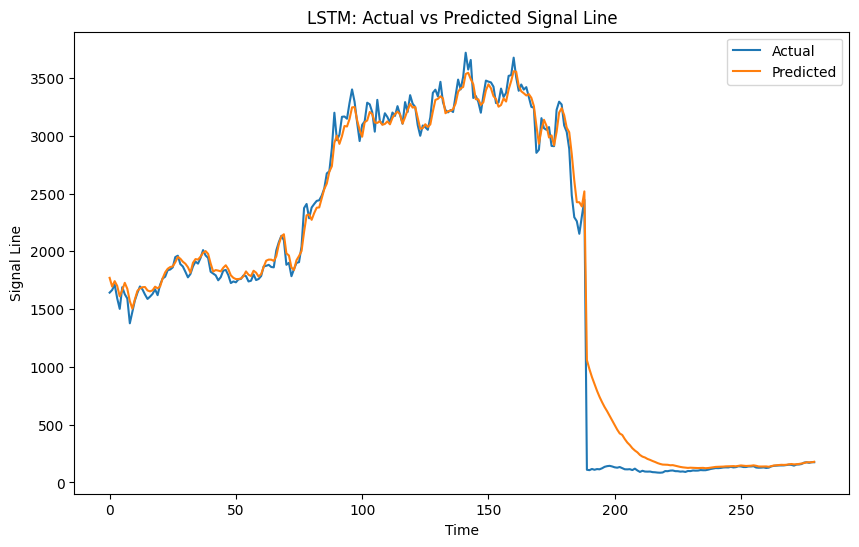

Mean Absolute Error (MAE): 83.61514699061802
Mean Squared Error (MSE): 25271.872447469697
Root Mean Squared Error (RMSE): 158.97129441339305
R-squared (R2): 0.984807095565498


In [744]:
y_pred_scaled = lstm.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred_scaled)
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('LSTM: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

# evaluate the model with mae, mse, rmse and r2
mae_lstm = mean_absolute_error(y_actual, y_pred)
mse_lstm = mean_squared_error(y_actual, y_pred)
rmse_lstm = mean_squared_error(y_actual, y_pred, squared = False)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_actual, y_pred)

print("Mean Absolute Error (MAE):", mae_lstm)
print("Mean Squared Error (MSE):", mse_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)
print("R-squared (R2):", r2_lstm)

## SVR

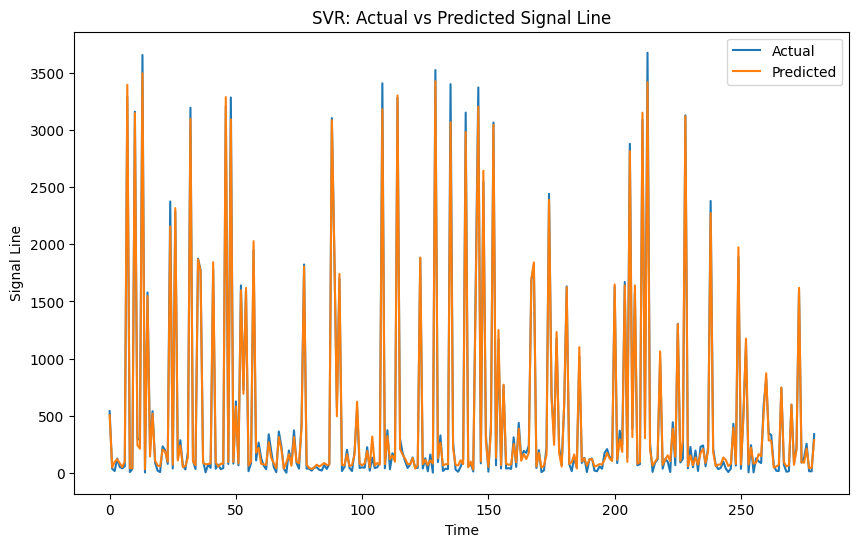

Mean Absolute Error (MAE): 43.980754502748105
Mean Squared Error (MSE): 3563.32025627853
Root Mean Squared Error (RMSE): 59.69355288704577
R-squared (R2): 0.9955781095688611


In [745]:
X = data[:, :-1]
y = data[:, -1]

sc_X = StandardScaler()
sc_y = StandardScaler()

# scale the features
X_scaled = sc_X.fit_transform(X)
y = y.reshape(-1, 1)
y_scaled = sc_y.fit_transform(y).flatten()

# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=True)
#SVR model
svr = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
y_pred_inv = sc_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()


# plotting
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('SVR: Actual vs Predicted Signal Line')
plt.legend()
plt.show()
# evaluate the model with mae, mse, rmse and r2
mae_svr = mean_absolute_error(y_actual, y_pred_inv)
mse_svr = mean_squared_error(y_actual, y_pred_inv)
rmse_svr = mean_squared_error(y_actual, y_pred_inv, squared = False)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_actual, y_pred_inv)

print("Mean Absolute Error (MAE):", mae_svr)
print("Mean Squared Error (MSE):", mse_svr)
print("Root Mean Squared Error (RMSE):", rmse_svr)
print("R-squared (R2):", r2_svr)

## XGBoost

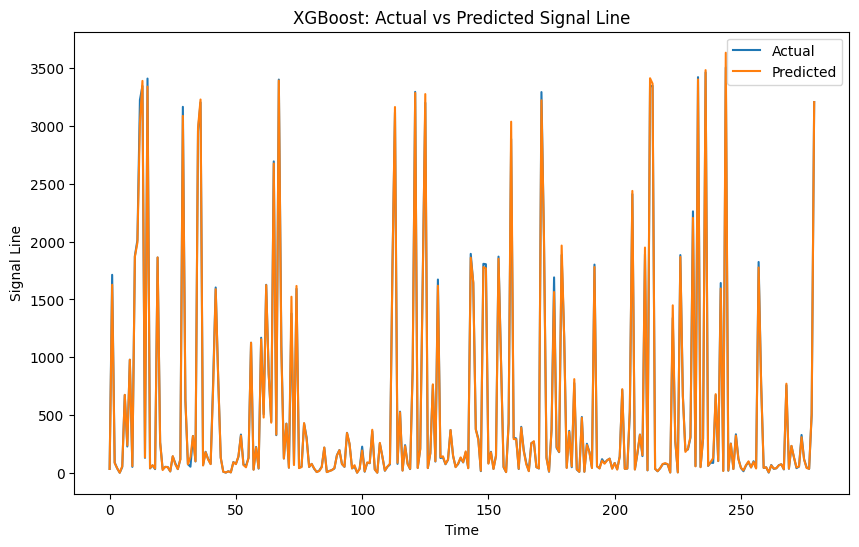

Mean Absolute Error (MAE): 12.331272163567547
Mean Squared Error (MSE): 794.827798853661
Root Mean Squared Error (RMSE): 28.192690521723197
R-squared (R2): -1.009708220186309


In [746]:
X = data[:, :-1]
y = data[:, -1]

sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)

y = y.reshape(-1, 1)
y_scaled = sc_y.fit_transform(y).flatten()

#split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=True)

#XGBoost model
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_xgb = sc_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred_xgb, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('XGBoost: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

# evaluate the model with mae, mse, rmse and r2
mae_xgb = mean_absolute_error(y_actual, y_pred_xgb)
mse_xgb = mean_squared_error(y_actual, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_actual, y_pred_inv)

print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared (R2):", r2_xgb)


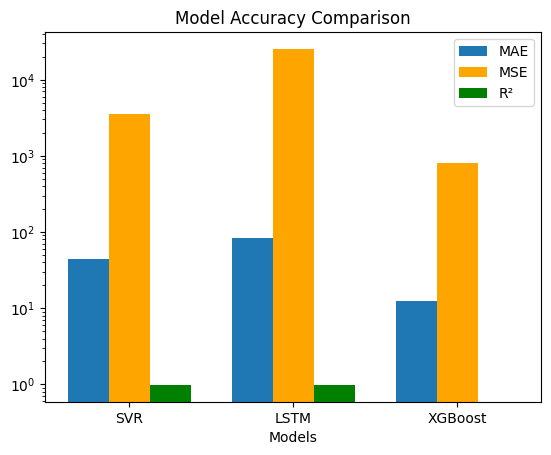

In [747]:
# accuracy metrics for each model
accuracy_metrics = {
    'SVR': [mae_svr, mse_svr, r2_svr],
    'LSTM': [mae_lstm, mse_lstm, r2_lstm],
    'XGBoost': [mae_xgb, mse_xgb, r2_xgb]

}

labels = list(accuracy_metrics.keys())
mae_values = [metrics[0] for metrics in accuracy_metrics.values()]
mse_values = [metrics[1] for metrics in accuracy_metrics.values()]
r2_values = [metrics[2] for metrics in accuracy_metrics.values()]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, mae_values, width, label='MAE')
ax.bar(x, mse_values, width, label='MSE', color='orange')
ax.bar(x + width, r2_values, width, label='R²', color='green')

ax.set_xlabel('Models')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yscale('log')
ax.legend()

plt.show()


In [748]:
results_df = pd.DataFrame({
    'Actual Values': y_actual,
    'LSTM Predicted Values': y_pred_lstm,
    'SVR Predicted Values': y_pred_inv,
    'XGBoost Predicted Values': y_pred_xgb
})

print(results_df)

     Actual Values  LSTM Predicted Values  SVR Predicted Values  \
0            34.60            1770.893555            503.779033   
1          1712.43            1694.984009             48.501688   
2            90.28            1742.153320             97.098582   
3            38.52            1700.677490            119.920129   
4             1.50            1610.648682             84.728947   
..             ...                    ...                   ...   
275         118.40             167.845978             89.310145   
276          48.10             174.336197            213.460519   
277          34.99             174.740189             40.742581   
278         499.00             174.346664             43.603247   
279        3206.20             178.737915            287.099701   

     XGBoost Predicted Values  
0                   34.016800  
1                 1626.872437  
2                   84.681900  
3                   39.878769  
4                    1.762651  
.. 

In [749]:
# comparing actual values with all predicted values
y_actual_flat = y_actual.flatten() if len(y_actual.shape) > 1 else y_actual
y_pred_lstm_flat = y_pred_lstm.flatten() if len(y_pred_lstm.shape) > 1 else y_pred_lstm
y_pred_inv_flat = y_pred_inv.flatten() if len(y_pred_inv.shape) > 1 else y_pred_inv
y_pred_xgb_flat = y_pred_xgb.flatten() if len(y_pred_xgb.shape) > 1 else y_pred_xgb

min_length = min(len(y_actual_flat), len(y_pred_lstm_flat), len(y_pred_inv_flat))

y_actual_flat = y_actual_flat[:min_length]
y_pred_lstm_flat = y_pred_lstm_flat[:min_length]
y_pred_inv_flat = y_pred_inv_flat[:min_length]
y_pred_xgb_flat = y_pred_xgb_flat[:min_length]

results_df = pd.DataFrame({
    'Actual Values': y_actual_flat,
    'LSTM Predicted Values': y_pred_lstm_flat,
    'SVR Predicted Values': y_pred_inv_flat,
    'XGBoost Predicted Values': y_pred_xgb_flat
})

print(results_df)


     Actual Values  LSTM Predicted Values  SVR Predicted Values  \
0            34.60            1770.893555            503.779033   
1          1712.43            1694.984009             48.501688   
2            90.28            1742.153320             97.098582   
3            38.52            1700.677490            119.920129   
4             1.50            1610.648682             84.728947   
..             ...                    ...                   ...   
275         118.40             167.845978             89.310145   
276          48.10             174.336197            213.460519   
277          34.99             174.740189             40.742581   
278         499.00             174.346664             43.603247   
279        3206.20             178.737915            287.099701   

     XGBoost Predicted Values  
0                   34.016800  
1                 1626.872437  
2                   84.681900  
3                   39.878769  
4                    1.762651  
.. 

In [750]:
#draw conclusions about buying or selling
decisions_lstm = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_lstm[:-1], y_actual[1:])]
decision_svr = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_inv, y_actual)]
decision_xgb = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_xgb, y_actual)]

#'print decisions
print("{:<20} {:20} {:20}".format("LSTM Decision", "SVR Decision", "XGBoost Decision"))
for i, (decision_lstm, decision_svr, decision_xgb) in enumerate(zip(decisions_lstm, decision_svr, decision_xgb)):
    print(f"Week {i+1:<3} Decision: {decision_lstm:<15} {decision_svr:<15} {decision_xgb:<15}")


LSTM Decision        SVR Decision         XGBoost Decision    
Week 1   Decision: 1               1               -1             
Week 2   Decision: 1               -1              -1             
Week 3   Decision: 1               1               -1             
Week 4   Decision: 1               1               1              
Week 5   Decision: 1               1               1              
Week 6   Decision: 1               1               1              
Week 7   Decision: 1               -1              1              
Week 8   Decision: 1               1               1              
Week 9   Decision: 1               -1              1              
Week 10  Decision: -1              -1              1              
Week 11  Decision: -1              1               -1             
Week 12  Decision: -1              -1              -1             
Week 13  Decision: -1              -1              -1             
Week 14  Decision: 1               1               1              

## CAC

In [751]:
cac = pd.read_csv("/content/Cac_weekly.csv")

In [752]:
cac['Date'] = pd.to_datetime(cac['Date'])


In [753]:
cac

,Date,Open,High,Low,Close,Volume
0,1994-03-06,2222.96,2241.7200,2079.92,2178.6900,0.0
1,1994-03-13,2199.09,2225.4800,2164.52,2174.9100,0.0
2,1994-03-20,2196.77,2260.6000,2196.77,2221.3400,0.0
3,1994-03-27,2205.56,2225.1500,2113.55,2136.6200,0.0
4,1994-04-03,2136.42,2165.8300,2069.37,2081.9400,0.0
...,...,...,...,...,...,...
1561,2024-02-04,7643.04,7702.9500,7570.07,7592.2600,300260000.0
1562,2024-02-11,7591.77,7685.4600,7558.23,7647.5200,314070000.0
1563,2024-02-18,7674.14,7800.9102,7598.02,7768.1802,302011765.0
1564,2024-02-25,7742.87,7976.3999,7727.96,7966.6802,223436630.0


In [754]:
cac.isnull().sum()

Date      0
Open      2
High      2
Low       2
Close     2
Volume    0
dtype: int64

In [755]:
cac.bfill(inplace=True)

In [756]:
cac.drop(["Volume"], axis = 1, inplace =True)

In [757]:
#sma
cac['SMA_20'] = cac['Close'].rolling(window=20).mean()

#ema
cac['EMA_20'] = cac['Close'].ewm(span=20, adjust=False).mean()

#weekly change
delta = cac['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)

#average gain and loss
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

#rs and rsi
rs = avg_gain / avg_loss
cac['RSI'] = 100 - (100 / (1 + rs))
exp1 = cac['Close'].ewm(span=12, adjust=False).mean()
exp2 = cac['Close'].ewm(span=26, adjust=False).mean()

cac['MACD'] = exp1 - exp2
cac['Signal_Line'] = cac['MACD'].ewm(span=9, adjust=False).mean()

cac.head(30)


,Date,Open,High,Low,Close,SMA_20,EMA_20,RSI,MACD,Signal_Line
0,1994-03-06,2222.96,2241.72,2079.92,2178.69,NaN,2178.690000,NaN,0.000000,0.000000
1,1994-03-13,2199.09,2225.48,2164.52,2174.91,NaN,2178.330000,NaN,-0.301538,-0.060308
2,1994-03-20,2196.77,2260.60,2196.77,2221.34,NaN,2182.426190,NaN,3.169467,0.585647
3,1994-03-27,2205.56,2225.15,2113.55,2136.62,NaN,2178.063696,NaN,-0.905493,0.287419
4,1994-04-03,2136.42,2165.83,2069.37,2081.94,NaN,2168.909058,NaN,-8.449745,-1.460014
5,1994-04-10,2067.80,2146.93,2057.17,2114.77,NaN,2163.752958,NaN,-11.645272,-3.497065
6,1994-04-17,2125.13,2161.97,2123.46,2159.59,NaN,2163.356485,NaN,-10.440796,-4.885812
7,1994-04-24,2162.50,2188.61,2079.27,2135.17,NaN,2160.672058,NaN,-11.326170,-6.173883
8,1994-05-01,2133.12,2172.39,2097.16,2165.96,NaN,2161.175672,NaN,-9.434582,-6.826023
9,1994-05-08,2165.96,2197.76,2127.64,2158.22,NaN,2160.894179,NaN,-8.462489,-7.153316


In [758]:
mean_SMA_20 = cac['SMA_20'].mean()
mean_RSI = cac['RSI'].mean()

cac['SMA_20'].fillna(mean_SMA_20, inplace=True)
cac['RSI'].fillna(mean_RSI, inplace = True)
print(cac)

           Date     Open       High      Low      Close       SMA_20  \
0    1994-03-06  2222.96  2241.7200  2079.92  2178.6900  4391.938795   
1    1994-03-13  2199.09  2225.4800  2164.52  2174.9100  4391.938795   
2    1994-03-20  2196.77  2260.6000  2196.77  2221.3400  4391.938795   
3    1994-03-27  2205.56  2225.1500  2113.55  2136.6200  4391.938795   
4    1994-04-03  2136.42  2165.8300  2069.37  2081.9400  4391.938795   
...         ...      ...        ...      ...        ...          ...   
1561 2024-02-04  7643.04  7702.9500  7570.07  7592.2600  7283.994500   
1562 2024-02-11  7591.77  7685.4600  7558.23  7647.5200  7307.129500   
1563 2024-02-18  7674.14  7800.9102  7598.02  7768.1802  7338.785510   
1564 2024-02-25  7742.87  7976.3999  7727.96  7966.6802  7384.112020   
1565 2024-03-03  7950.15  7953.1500  7922.89  7929.8200  7430.426520   

           EMA_20        RSI        MACD  Signal_Line  
0     2178.690000  54.242357    0.000000     0.000000  
1     2178.330000  54.2

In [759]:
data = df[['Open', 'High', 'Low', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Close']].values
print(data)

[[ 1.80000000e+01  3.00000000e+01  1.80000000e+01 ...  5.66024153e+01
   0.00000000e+00  1.72920000e+00]
 [ 2.11250000e+01  2.12500000e+01  1.57500000e+01 ...  5.66024153e+01
  -1.82837607e-02  1.50000000e+00]
 [ 1.81250000e+01  1.97500000e+01  1.75000000e+01 ...  5.66024153e+01
  -3.24002825e-02  1.50000000e+00]
 ...
 [ 1.74800000e+02  1.75390000e+02  1.65750000e+02 ...  7.48610845e+01
   7.48450287e+00  1.69510000e+02]
 [ 1.67830000e+02  1.75750000e+02  1.65740000e+02 ...  7.65923283e+01
   8.26947401e+00  1.74990000e+02]
 [ 1.75700000e+02  1.76370000e+02  1.74260000e+02 ...  7.55616438e+01
   8.76950013e+00  1.74730000e+02]]


In [760]:
X = data[:, :-1]
y = data[:, -1]

sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

#split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)


## LSTM

In [761]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
lstm = Sequential()
lstm.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error')

# training the model
lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, shuffle=False)

# evaluating the model
loss = lstm.evaluate(X_test, y_test)
print("Test Loss:", loss)

y_pred_scaled = lstm.predict(X_test)

# Converting the scaled values back
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_lstm = sc_y.inverse_transform(y_pred_scaled).flatten()

Epoch 1/100
35/35 - 2s - loss: 0.0051 - 2s/epoch - 53ms/step
Epoch 2/100
35/35 - 0s - loss: 0.0090 - 78ms/epoch - 2ms/step
Epoch 3/100
35/35 - 0s - loss: 0.0039 - 80ms/epoch - 2ms/step
Epoch 4/100
35/35 - 0s - loss: 0.0023 - 80ms/epoch - 2ms/step
Epoch 5/100
35/35 - 0s - loss: 0.0011 - 79ms/epoch - 2ms/step
Epoch 6/100
35/35 - 0s - loss: 3.6082e-04 - 76ms/epoch - 2ms/step
Epoch 7/100
35/35 - 0s - loss: 1.2160e-04 - 79ms/epoch - 2ms/step
Epoch 8/100
35/35 - 0s - loss: 8.4354e-05 - 77ms/epoch - 2ms/step
Epoch 9/100
35/35 - 0s - loss: 8.2621e-05 - 75ms/epoch - 2ms/step
Epoch 10/100
35/35 - 0s - loss: 8.0641e-05 - 76ms/epoch - 2ms/step
Epoch 11/100
35/35 - 0s - loss: 7.7673e-05 - 74ms/epoch - 2ms/step
Epoch 12/100
35/35 - 0s - loss: 7.5053e-05 - 76ms/epoch - 2ms/step
Epoch 13/100
35/35 - 0s - loss: 7.3566e-05 - 77ms/epoch - 2ms/step
Epoch 14/100
35/35 - 0s - loss: 7.2931e-05 - 80ms/epoch - 2ms/step
Epoch 15/100
35/35 - 0s - loss: 7.2752e-05 - 80ms/epoch - 2ms/step
Epoch 16/100
35/35 - 0s -

9/9 [==============================] - 0s 2ms/step


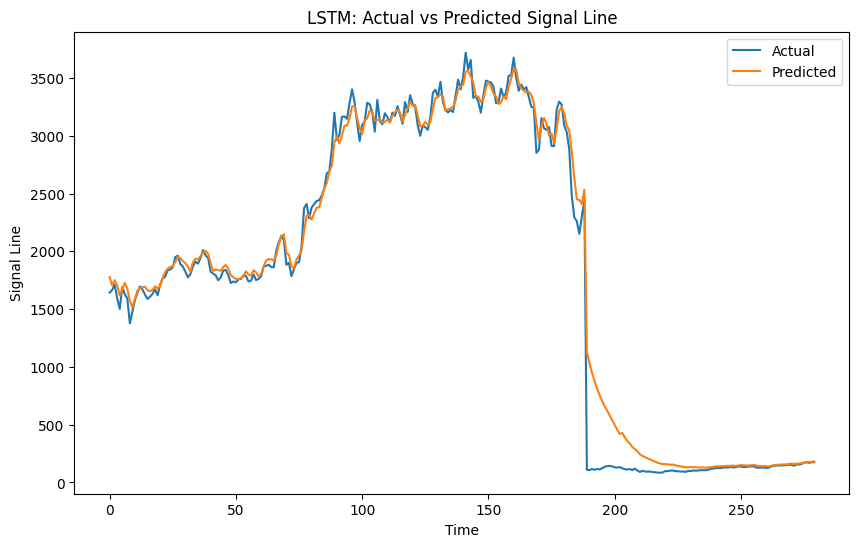

Mean Absolute Error (MAE): 85.77558907767158
Mean Squared Error (MSE): 27028.087028902435
Root Mean Squared Error (RMSE): 164.4022111435927
R-squared (R2): 0.9837512972522685


In [762]:
y_pred_scaled = lstm.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred_scaled)
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1))
#plot
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('LSTM: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

mae_lstm = mean_absolute_error(y_actual, y_pred)
mse_lstm = mean_squared_error(y_actual, y_pred)
rmse_lstm = mean_squared_error(y_actual, y_pred, squared = False)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_actual, y_pred)

print("Mean Absolute Error (MAE):", mae_lstm)
print("Mean Squared Error (MSE):", mse_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)
print("R-squared (R2):", r2_lstm)

## SVR

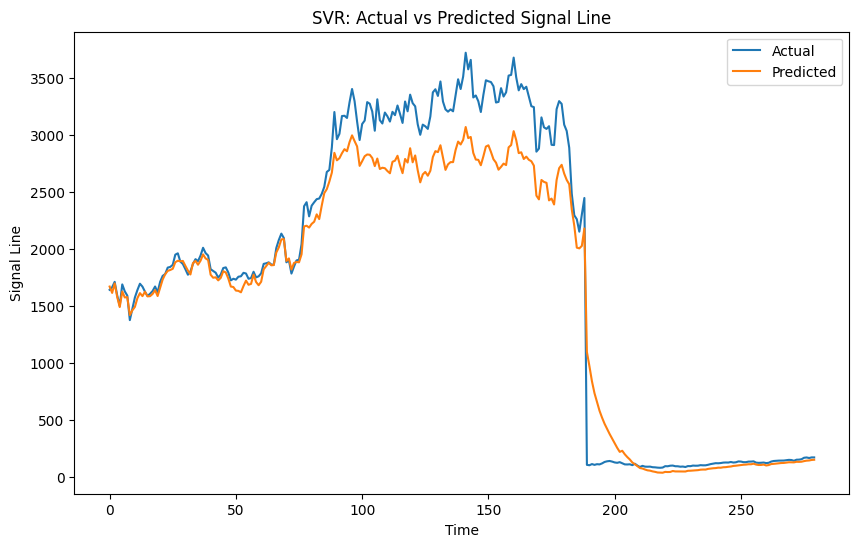

Mean Absolute Error (MAE): 213.56896325744128
Mean Squared Error (MSE): 97270.99844208451
Root Mean Squared Error (RMSE): 311.8829883819964
R-squared (R2): 0.9415227745134035


In [763]:
X = data[:, :-1]
y = data[:, -1]
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

#svr model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)

#train model
svr_model.fit(X_train, y_train)

#predicting the trained model
y_pred_scaled = svr_model.predict(X_test)

y_pred_inv = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_actual_inv = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(y_actual_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('SVR: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

mae_svr = mean_absolute_error(y_actual_inv, y_pred_inv)
mse_svr = mean_squared_error(y_actual_inv, y_pred_inv)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_actual_inv, y_pred_inv)

print("Mean Absolute Error (MAE):", mae_svr)
print("Mean Squared Error (MSE):", mse_svr)
print("Root Mean Squared Error (RMSE):", rmse_svr)
print("R-squared (R2):", r2_svr)


## XGBoost

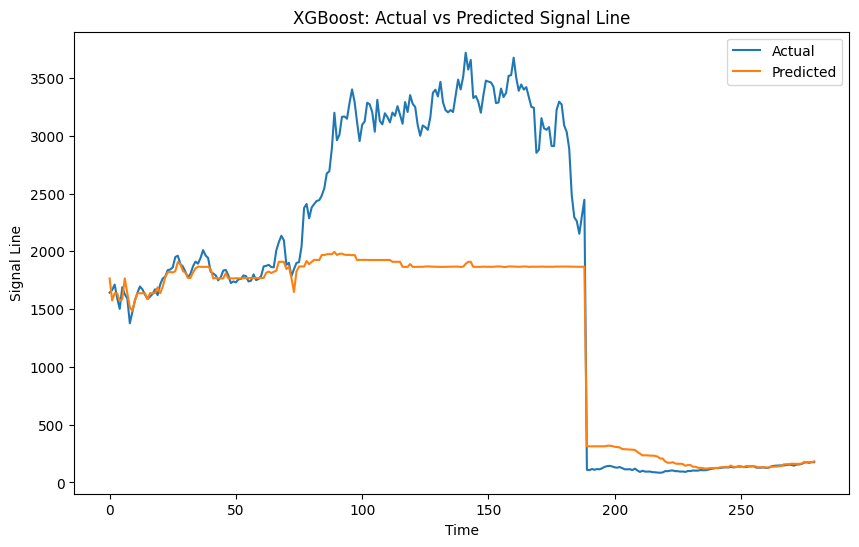

Mean Absolute Error (MAE): 528.100735291312
Mean Squared Error (MSE): 656809.1831804491
Root Mean Squared Error (RMSE): 810.4376491627527
R-squared (R2): 0.6051404907766127


In [764]:
X = data[:, :-1]
y = data[:, -1]

#scaling
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

#XGBoost model
xgb_model = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)

#train model
xgb_model.fit(X_train, y_train)

#predicting the trained model
y_pred_scaled = xgb_model.predict(X_test)

y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_xgb = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred_xgb, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('XGBoost: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

mae_xgb = mean_absolute_error(y_actual, y_pred_xgb)
mse_xgb = mean_squared_error(y_actual, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_actual, y_pred_xgb)

print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared (R2):", r2_xgb)


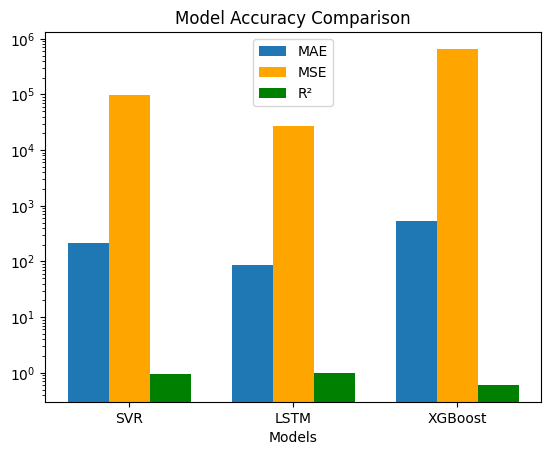

In [765]:
# Accuracy metrics for each model
accuracy_metrics = {
    'SVR': [mae_svr, mse_svr, r2_svr],
    'LSTM': [mae_lstm, mse_lstm, r2_lstm],
    'XGBoost': [mae_xgb, mse_xgb, r2_xgb]

}

labels = list(accuracy_metrics.keys())
mae_values = [metrics[0] for metrics in accuracy_metrics.values()]
mse_values = [metrics[1] for metrics in accuracy_metrics.values()]
r2_values = [metrics[2] for metrics in accuracy_metrics.values()]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, mae_values, width, label='MAE')
ax.bar(x, mse_values, width, label='MSE', color='orange')
ax.bar(x + width, r2_values, width, label='R²', color='green')

ax.set_xlabel('Models')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yscale('log')
ax.legend()
plt.show()


In [766]:
results_df = pd.DataFrame({
    'Actual Values': y_actual,
    'LSTM Predicted Values': y_pred_lstm,
    'SVR Predicted Values': y_pred_inv,
    'XGBoost Predicted Values': y_pred_xgb
})

print(results_df)

     Actual Values  LSTM Predicted Values  SVR Predicted Values  \
0          1642.81            1776.643433           1671.329075   
1          1665.53            1704.615112           1615.573117   
2          1712.43            1750.205322           1698.822333   
3          1593.41            1705.078735           1580.280766   
4          1502.06            1617.233276           1491.760836   
..             ...                    ...                   ...   
275         171.81             171.110565            142.484775   
276         174.45             177.184860            146.392172   
277         169.51             177.612106            147.955202   
278         174.99             177.527283            152.612372   
279         174.73             181.600723            154.235747   

     XGBoost Predicted Values  
0                 1765.229858  
1                 1575.446411  
2                 1638.473511  
3                 1634.861938  
4                 1570.973877  
.. 

In [767]:
#draw conclusions about buying or selling
decisions_lstm = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_lstm[:-1], y_actual[1:])]
decision_svr = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_inv, y_actual)]
decision_xgb = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_xgb, y_actual)]

#'print decisions
print("{:<20} {:20} {:20}".format("LSTM Decision", "SVR Decision", "XGBoost Decision"))
for i, (decision_lstm, decision_svr, decision_xgb) in enumerate(zip(decisions_lstm, decision_svr, decision_xgb)):
    print(f"Week {i+1:<3} Decision: {decision_lstm:<15} {decision_svr:<15} {decision_xgb:<15}")


LSTM Decision        SVR Decision         XGBoost Decision    
Week 1   Decision: 1               1               1              
Week 2   Decision: -1              -1              -1             
Week 3   Decision: 1               -1              -1             
Week 4   Decision: 1               -1              1              
Week 5   Decision: -1              -1              1              
Week 6   Decision: 1               -1              -1             
Week 7   Decision: 1               -1              1              
Week 8   Decision: 1               -1              1              
Week 9   Decision: 1               1               1              
Week 10  Decision: -1              -1              1              
Week 11  Decision: -1              -1              -1             
Week 12  Decision: -1              -1              -1             
Week 13  Decision: 1               -1              -1             
Week 14  Decision: 1               -1              -1             

# IBM

In [768]:
ibm = pd.read_csv("/content/IBM_weekly.csv")

In [769]:
ibm['Date'] = pd.to_datetime(ibm['Date'])


In [770]:
ibm

,Date,Open,High,Low,Close,Volume
0,1994-03-06,53.125,53.875,52.125,8.0537,9055900
1,1994-03-13,53.000,56.250,51.375,8.5512,14884100
2,1994-03-20,56.125,58.375,55.875,8.7424,12402200
3,1994-03-27,56.875,58.875,53.625,8.2642,12237600
4,1994-04-03,54.375,55.000,52.000,8.3599,14114100
...,...,...,...,...,...,...
1561,2024-02-04,187.460,189.460,182.710,184.1115,28282700
1562,2024-02-11,185.510,187.180,181.490,186.3400,22784812
1563,2024-02-18,185.900,188.950,182.260,187.6400,21745006
1564,2024-02-25,187.640,188.770,178.750,185.7200,17487852


In [771]:
ibm.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [772]:
ibm.bfill(inplace=True)

In [773]:
ibm.drop(["Volume"], axis = 1, inplace =True)

In [774]:
ibm['SMA_20'] = ibm['Close'].rolling(window=20).mean()
ibm['EMA_20'] = ibm['Close'].ewm(span=20, adjust=False).mean()

delta = ibm['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
ibm['RSI'] = 100 - (100 / (1 + rs))

exp1 = ibm['Close'].ewm(span=12, adjust=False).mean()
exp2 = ibm['Close'].ewm(span=26, adjust=False).mean()
ibm['MACD'] = exp1 - exp2
cac['Signal_Line'] = ibm['MACD'].ewm(span=9, adjust=False).mean()

ibm.head(30)


,Date,Open,High,Low,Close,SMA_20,EMA_20,RSI,MACD
0,1994-03-06,53.125,53.875,52.1250,8.0537,NaN,8.053700,NaN,0.000000
1,1994-03-13,53.000,56.250,51.3750,8.5512,NaN,8.101081,NaN,0.039687
2,1994-03-20,56.125,58.375,55.8750,8.7424,NaN,8.162159,NaN,0.085580
3,1994-03-27,56.875,58.875,53.6250,8.2642,NaN,8.171877,NaN,0.082415
4,1994-04-03,54.375,55.000,52.0000,8.3599,NaN,8.189784,NaN,0.086629
5,1994-04-10,53.000,54.125,52.2500,8.0346,NaN,8.175005,NaN,0.062994
6,1994-04-17,52.625,54.500,51.8750,8.1114,NaN,8.168947,NaN,0.049886
7,1994-04-24,52.875,59.500,51.3750,8.9911,NaN,8.247247,NaN,0.109222
8,1994-05-01,58.500,59.250,56.7500,8.8002,NaN,8.299910,NaN,0.139238
9,1994-05-08,57.500,58.625,56.2500,8.6847,NaN,8.336556,NaN,0.151954


In [775]:
mean_SMA_20 = ibm['SMA_20'].mean()
mean_RSI = ibm['RSI'].mean()

ibm['SMA_20'].fillna(mean_SMA_20, inplace=True)
ibm['RSI'].fillna(mean_RSI, inplace = True)
print(ibm)

           Date     Open     High      Low     Close      SMA_20      EMA_20  \
0    1994-03-06   53.125   53.875   52.125    8.0537   90.462543    8.053700   
1    1994-03-13   53.000   56.250   51.375    8.5512   90.462543    8.101081   
2    1994-03-20   56.125   58.375   55.875    8.7424   90.462543    8.162159   
3    1994-03-27   56.875   58.875   53.625    8.2642   90.462543    8.171877   
4    1994-04-03   54.375   55.000   52.000    8.3599   90.462543    8.189784   
...         ...      ...      ...      ...       ...         ...         ...   
1561 2024-02-04  187.460  189.460  182.710  184.1115  154.654485  158.754517   
1562 2024-02-11  185.510  187.180  181.490  186.3400  156.773975  161.381706   
1563 2024-02-18  185.900  188.950  182.260  187.6400  159.282305  163.882496   
1564 2024-02-25  187.640  188.770  178.750  185.7200  161.609880  165.962258   
1565 2024-03-03  185.600  186.125  184.060  184.1300  164.032860  167.692519   

            RSI       MACD  
0     54.3

In [776]:
data = ibm[['Open', 'High', 'Low', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Close']].values
print(data)

[[5.31250000e+01 5.38750000e+01 5.21250000e+01 ... 5.43270509e+01
  0.00000000e+00 8.05370000e+00]
 [5.30000000e+01 5.62500000e+01 5.13750000e+01 ... 5.43270509e+01
  3.96866097e-02 8.55120000e+00]
 [5.61250000e+01 5.83750000e+01 5.58750000e+01 ... 5.43270509e+01
  8.55802599e-02 8.74240000e+00]
 ...
 [1.85900000e+02 1.88950000e+02 1.82260000e+02 ... 8.83731246e+01
  1.19646041e+01 1.87640000e+02]
 [1.87640000e+02 1.88770000e+02 1.78750000e+02 ... 8.41015612e+01
  1.21989558e+01 1.85720000e+02]
 [1.85600000e+02 1.86125000e+02 1.84060000e+02 ... 8.06699864e+01
  1.21167077e+01 1.84130000e+02]]


In [777]:
X = data[:, :-1]
y = data[:, -1]

# scaling
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)


## LSTM

In [778]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
lstm = Sequential()
lstm.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error')

# training the model
lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, shuffle=False)

# evaluating the model
loss = lstm.evaluate(X_test, y_test)
print("Test Loss:", loss)

y_pred_scaled = lstm.predict(X_test)

# converting the scaled values back
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_lstm = sc_y.inverse_transform(y_pred_scaled).flatten()

Epoch 1/100
40/40 - 2s - loss: 0.0342 - 2s/epoch - 45ms/step
Epoch 2/100
40/40 - 0s - loss: 0.0260 - 102ms/epoch - 3ms/step
Epoch 3/100
40/40 - 0s - loss: 0.0160 - 100ms/epoch - 2ms/step
Epoch 4/100
40/40 - 0s - loss: 0.0116 - 95ms/epoch - 2ms/step
Epoch 5/100
40/40 - 0s - loss: 0.0081 - 96ms/epoch - 2ms/step
Epoch 6/100
40/40 - 0s - loss: 0.0060 - 96ms/epoch - 2ms/step
Epoch 7/100
40/40 - 0s - loss: 0.0048 - 96ms/epoch - 2ms/step
Epoch 8/100
40/40 - 0s - loss: 0.0041 - 97ms/epoch - 2ms/step
Epoch 9/100
40/40 - 0s - loss: 0.0036 - 100ms/epoch - 3ms/step
Epoch 10/100
40/40 - 0s - loss: 0.0032 - 97ms/epoch - 2ms/step
Epoch 11/100
40/40 - 0s - loss: 0.0029 - 96ms/epoch - 2ms/step
Epoch 12/100
40/40 - 0s - loss: 0.0026 - 95ms/epoch - 2ms/step
Epoch 13/100
40/40 - 0s - loss: 0.0023 - 96ms/epoch - 2ms/step
Epoch 14/100
40/40 - 0s - loss: 0.0021 - 98ms/epoch - 2ms/step
Epoch 15/100
40/40 - 0s - loss: 0.0019 - 97ms/epoch - 2ms/step
Epoch 16/100
40/40 - 0s - loss: 0.0017 - 93ms/epoch - 2ms/step

10/10 [==============================] - 0s 2ms/step


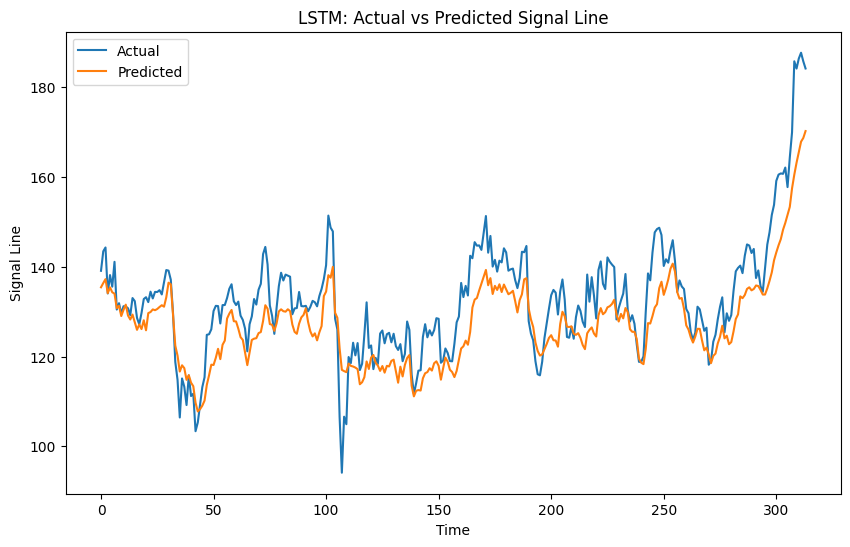

Mean Absolute Error (MAE): 6.315806638637244
Mean Squared Error (MSE): 58.56738077858645
Root Mean Squared Error (RMSE): 7.652932822035383
R-squared (R2): 0.6545842454062625


In [779]:
y_pred_scaled = lstm.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred_scaled)
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform actual values

plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('LSTM: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

mae_lstm = mean_absolute_error(y_actual, y_pred)
mse_lstm = mean_squared_error(y_actual, y_pred)
rmse_lstm = mean_squared_error(y_actual, y_pred, squared = False)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_actual, y_pred)

print("Mean Absolute Error (MAE):", mae_lstm)
print("Mean Squared Error (MSE):", mse_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)
print("R-squared (R2):", r2_lstm)

## SVR

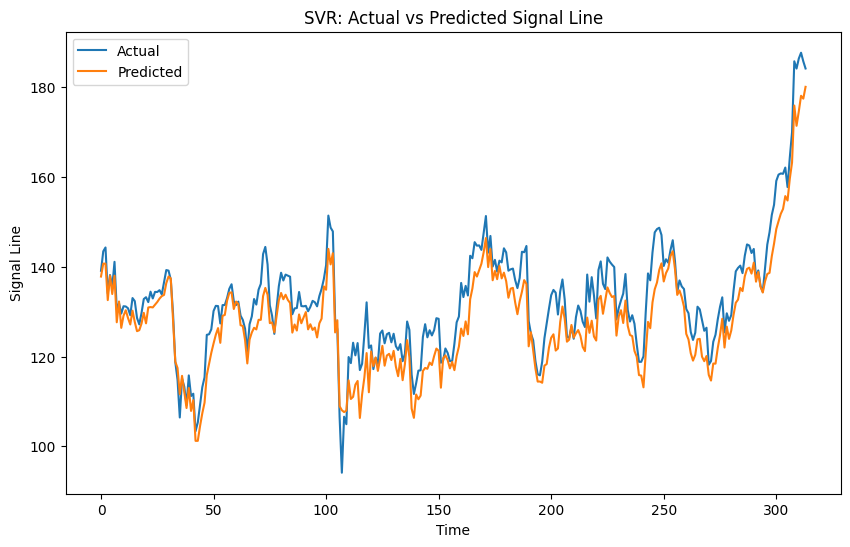

Mean Absolute Error (MAE): 4.822970148105721
Mean Squared Error (MSE): 31.883238417056475
Root Mean Squared Error (RMSE): 5.6465244546585005
R-squared (R2): 0.8119606390056255


In [780]:
X = data[:, :-1]
y = data[:, -1]
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

#svr model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)

#train model
svr_model.fit(X_train, y_train)

#predicting the trained model
y_pred_scaled = svr_model.predict(X_test)

y_pred_inv = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_actual_inv = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(y_actual_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('SVR: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

mae_svr = mean_absolute_error(y_actual_inv, y_pred_inv)
mse_svr = mean_squared_error(y_actual_inv, y_pred_inv)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_actual_inv, y_pred_inv)

print("Mean Absolute Error (MAE):", mae_svr)
print("Mean Squared Error (MSE):", mse_svr)
print("Root Mean Squared Error (RMSE):", rmse_svr)
print("R-squared (R2):", r2_svr)


## XGBoost

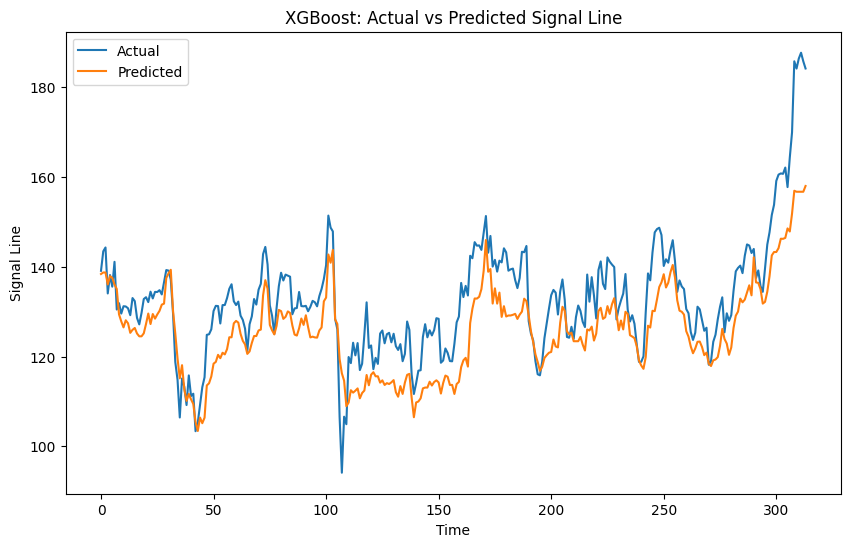

Mean Absolute Error (MAE): 7.510131905947125
Mean Squared Error (MSE): 82.25806786937348
Root Mean Squared Error (RMSE): 9.069623358738415
R-squared (R2): 0.5148625018431585


In [781]:
X = data[:, :-1]
y = data[:, -1]

#scaling
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

#XGBoost model
xgb_model = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)

#train model
xgb_model.fit(X_train, y_train)

#predicting the trained model
y_pred_scaled = xgb_model.predict(X_test)

y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_xgb = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred_xgb, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('XGBoost: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

mae_xgb = mean_absolute_error(y_actual, y_pred_xgb)
mse_xgb = mean_squared_error(y_actual, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_actual, y_pred_xgb)

print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared (R2):", r2_xgb)


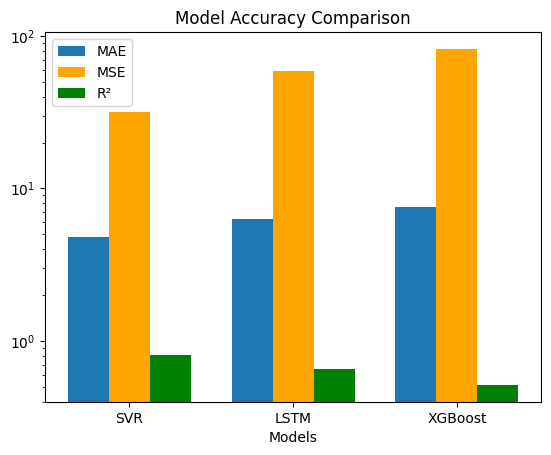

In [782]:
# Accuracy metrics for each model
accuracy_metrics = {
    'SVR': [mae_svr, mse_svr, r2_svr],
    'LSTM': [mae_lstm, mse_lstm, r2_lstm],
    'XGBoost': [mae_xgb, mse_xgb, r2_xgb]

}

labels = list(accuracy_metrics.keys())
mae_values = [metrics[0] for metrics in accuracy_metrics.values()]
mse_values = [metrics[1] for metrics in accuracy_metrics.values()]
r2_values = [metrics[2] for metrics in accuracy_metrics.values()]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, mae_values, width, label='MAE')
ax.bar(x, mse_values, width, label='MSE', color='orange')
ax.bar(x + width, r2_values, width, label='R²', color='green')

ax.set_xlabel('Models')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yscale('log')
ax.legend()
plt.show()


In [783]:
results_df = pd.DataFrame({
    'Actual Values': y_actual,
    'LSTM Predicted Values': y_pred_lstm,
    'SVR Predicted Values': y_pred_inv,
    'XGBoost Predicted Values': y_pred_xgb
})

print(results_df)

     Actual Values  LSTM Predicted Values  SVR Predicted Values  \
0       139.083951             135.410797            137.806271   
1       143.423291             136.352173            140.691627   
2       144.278555             137.228836            140.666340   
3       134.042394             134.105515            132.557657   
4       138.129656             135.399063            137.978334   
..             ...                    ...                   ...   
309     184.111500             163.144226            171.368410   
310     186.340000             165.498917            174.568141   
311     187.640000             167.827286            178.050981   
312     185.720000             168.662262            177.417463   
313     184.130000             170.194214            180.042009   

     XGBoost Predicted Values  
0                  138.366119  
1                  138.711060  
2                  138.711060  
3                  136.040436  
4                  137.886581  
.. 

In [784]:
#draw conclusions about buying or selling
decisions_lstm = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_lstm[:-1], y_actual[1:])]
decision_svr = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_inv, y_actual)]
decision_xgb = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_xgb, y_actual)]

print("{:<20} {:20} {:20}".format("LSTM Decision", "SVR Decision", "XGBoost Decision"))
for i, (decision_lstm, decision_svr, decision_xgb) in enumerate(zip(decisions_lstm, decision_svr, decision_xgb)):
    print(f"Week {i+1:<3} Decision: {decision_lstm:<15} {decision_svr:<15} {decision_xgb:<15}")


LSTM Decision        SVR Decision         XGBoost Decision    
Week 1   Decision: -1              -1              -1             
Week 2   Decision: -1              -1              -1             
Week 3   Decision: 1               -1              -1             
Week 4   Decision: -1              -1              1              
Week 5   Decision: -1              -1              -1             
Week 6   Decision: -1              -1              1              
Week 7   Decision: 1               -1              -1             
Week 8   Decision: -1              -1              1              
Week 9   Decision: 1               1               -1             
Week 10  Decision: -1              -1              -1             
Week 11  Decision: -1              -1              -1             
Week 12  Decision: 1               -1              -1             
Week 13  Decision: -1              -1              -1             
Week 14  Decision: -1              -1              -1             

# MICROSOFT

In [785]:
microsoft = pd.read_csv("/content/Microsoft_weekly.csv")

In [786]:
microsoft['Date'] = pd.to_datetime(ibm['Date'])


In [787]:
microsoft

,Date,Open,High,Low,Close,Volume
0,1994-03-06,81.250,83.25,80.50,1.8029,7166700
1,1994-03-13,81.250,82.25,79.75,1.8194,5429200
2,1994-03-20,82.500,85.25,82.25,1.8860,7539800
3,1994-03-27,85.000,89.25,82.25,1.9473,13523800
4,1994-04-03,87.500,88.00,82.50,1.8860,11122900
...,...,...,...,...,...,...
1561,2024-02-04,406.060,415.32,397.21,410.4610,164773351
1562,2024-02-11,409.900,420.82,402.91,419.7737,109333537
1563,2024-02-18,420.555,420.74,403.39,404.0600,113551077
1564,2024-02-25,403.240,415.86,397.22,410.3400,86244739


In [788]:
microsoft.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [789]:
microsoft.bfill(inplace=True)

In [790]:
microsoft.drop(["Volume"], axis = 1, inplace =True)

In [791]:
microsoft['SMA_20'] = microsoft['Close'].rolling(window=20).mean()
microsoft['EMA_20'] = microsoft['Close'].ewm(span=20, adjust=False).mean()

delta = microsoft['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
microsoft['RSI'] = 100 - (100 / (1 + rs))

exp1 = microsoft['Close'].ewm(span=12, adjust=False).mean()
exp2 = microsoft['Close'].ewm(span=26, adjust=False).mean()
microsoft['MACD'] = exp1 - exp2
cac['Signal_Line'] = microsoft['MACD'].ewm(span=9, adjust=False).mean()
microsoft.head(30)


,Date,Open,High,Low,Close,SMA_20,EMA_20,RSI,MACD
0,1994-03-06,81.250,83.2500,80.5000,1.8029,NaN,1.802900,NaN,0.000000
1,1994-03-13,81.250,82.2500,79.7500,1.8194,NaN,1.804471,NaN,0.001316
2,1994-03-20,82.500,85.2500,82.2500,1.8860,NaN,1.812236,NaN,0.007645
3,1994-03-27,85.000,89.2500,82.2500,1.9473,NaN,1.825099,NaN,0.017407
4,1994-04-03,87.500,88.0000,82.5000,1.8860,NaN,1.830899,NaN,0.019966
5,1994-04-10,82.500,90.1250,82.0000,1.9362,NaN,1.840928,NaN,0.025749
6,1994-04-17,87.000,87.2500,83.0000,1.8889,NaN,1.845497,NaN,0.026212
7,1994-04-24,84.750,92.7500,82.2500,2.0418,NaN,1.864192,NaN,0.038474
8,1994-05-01,92.000,95.2500,91.2500,2.0589,NaN,1.882736,NaN,0.049007
9,1994-05-08,92.750,96.2500,90.8750,2.0531,NaN,1.898961,NaN,0.056237


In [792]:
mean_SMA_20 = microsoft['SMA_20'].mean()
mean_RSI = microsoft['RSI'].mean()

microsoft['SMA_20'].fillna(mean_SMA_20, inplace=True)
microsoft['RSI'].fillna(mean_RSI, inplace = True)
print(microsoft)

           Date     Open    High     Low     Close      SMA_20      EMA_20  \
0    1994-03-06   81.250   83.25   80.50    1.8029   62.294771    1.802900   
1    1994-03-13   81.250   82.25   79.75    1.8194   62.294771    1.804471   
2    1994-03-20   82.500   85.25   82.25    1.8860   62.294771    1.812236   
3    1994-03-27   85.000   89.25   82.25    1.9473   62.294771    1.825099   
4    1994-04-03   87.500   88.00   82.50    1.8860   62.294771    1.830899   
...         ...      ...     ...     ...       ...         ...         ...   
1561 2024-02-04  406.060  415.32  397.21  410.4610  361.766425  368.608737   
1562 2024-02-11  409.900  420.82  402.91  419.7737  366.965915  373.481591   
1563 2024-02-18  420.555  420.74  403.39  404.0600  371.442475  376.393820   
1564 2024-02-25  403.240  415.86  397.22  410.3400  375.659760  379.626790   
1565 2024-03-03  411.455  412.16  407.36  407.5400  379.713635  382.285191   

            RSI       MACD  
0     57.886619   0.000000  
1    

In [793]:
data = microsoft[['Open', 'High', 'Low', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Close']].values
print(data)

[[8.12500000e+01 8.32500000e+01 8.05000000e+01 ... 5.78866186e+01
  0.00000000e+00 1.80290000e+00]
 [8.12500000e+01 8.22500000e+01 7.97500000e+01 ... 5.78866186e+01
  1.31623932e-03 1.81940000e+00]
 [8.25000000e+01 8.52500000e+01 8.22500000e+01 ... 5.78866186e+01
  7.64530158e-03 1.88600000e+00]
 ...
 [4.20555000e+02 4.20740000e+02 4.03390000e+02 ... 6.84311704e+01
  2.18921360e+01 4.04060000e+02]
 [4.03240000e+02 4.15860000e+02 3.97220000e+02 ... 7.00794053e+01
  2.19043304e+01 4.10340000e+02]
 [4.11455000e+02 4.12160000e+02 4.07360000e+02 ... 6.57565004e+01
  2.14409005e+01 4.07540000e+02]]


In [794]:
X = data[:, :-1]  # Input features (all columns except the last one)
y = data[:, -1]   # Target variable (last column)

# Scaling
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)


## LSTM

In [795]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
lstm = Sequential()
lstm.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error')

# training the model
lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, shuffle=False)

# evaluating the model
loss = lstm.evaluate(X_test, y_test)
print("Test Loss:", loss)

y_pred_scaled = lstm.predict(X_test)

# Converting the scaled values back
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_lstm = sc_y.inverse_transform(y_pred_scaled).flatten()

Epoch 1/100
40/40 - 2s - loss: 5.2527e-04 - 2s/epoch - 45ms/step
Epoch 2/100
40/40 - 0s - loss: 0.0032 - 99ms/epoch - 2ms/step
Epoch 3/100
40/40 - 0s - loss: 0.0017 - 94ms/epoch - 2ms/step
Epoch 4/100
40/40 - 0s - loss: 0.0013 - 94ms/epoch - 2ms/step
Epoch 5/100
40/40 - 0s - loss: 0.0010 - 92ms/epoch - 2ms/step
Epoch 6/100
40/40 - 0s - loss: 8.7348e-04 - 93ms/epoch - 2ms/step
Epoch 7/100
40/40 - 0s - loss: 7.3519e-04 - 93ms/epoch - 2ms/step
Epoch 8/100
40/40 - 0s - loss: 6.1560e-04 - 93ms/epoch - 2ms/step
Epoch 9/100
40/40 - 0s - loss: 5.0878e-04 - 91ms/epoch - 2ms/step
Epoch 10/100
40/40 - 0s - loss: 4.1250e-04 - 95ms/epoch - 2ms/step
Epoch 11/100
40/40 - 0s - loss: 3.2700e-04 - 100ms/epoch - 2ms/step
Epoch 12/100
40/40 - 0s - loss: 2.5386e-04 - 97ms/epoch - 2ms/step
Epoch 13/100
40/40 - 0s - loss: 1.9466e-04 - 96ms/epoch - 2ms/step
Epoch 14/100
40/40 - 0s - loss: 1.4988e-04 - 100ms/epoch - 3ms/step
Epoch 15/100
40/40 - 0s - loss: 1.1855e-04 - 95ms/epoch - 2ms/step
Epoch 16/100
40/40 

10/10 [==============================] - 0s 2ms/step


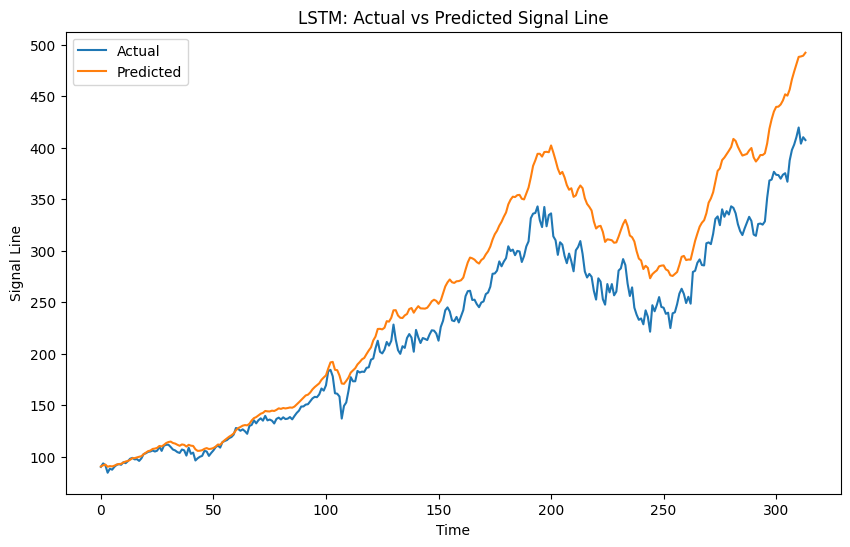

Mean Absolute Error (MAE): 32.07395570204685
Mean Squared Error (MSE): 1640.3587731914731
Root Mean Squared Error (RMSE): 40.501342856644555
R-squared (R2): 0.783577083903015


In [796]:
y_pred_scaled = lstm.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred_scaled)
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform actual values

plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('LSTM: Actual vs Predicted Signal Line')
plt.legend()
plt.show()


mae_lstm = mean_absolute_error(y_actual, y_pred)
mse_lstm = mean_squared_error(y_actual, y_pred)
rmse_lstm = mean_squared_error(y_actual, y_pred, squared = False)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_actual, y_pred)

print("Mean Absolute Error (MAE):", mae_lstm)
print("Mean Squared Error (MSE):", mse_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)
print("R-squared (R2):", r2_lstm)

## SVR

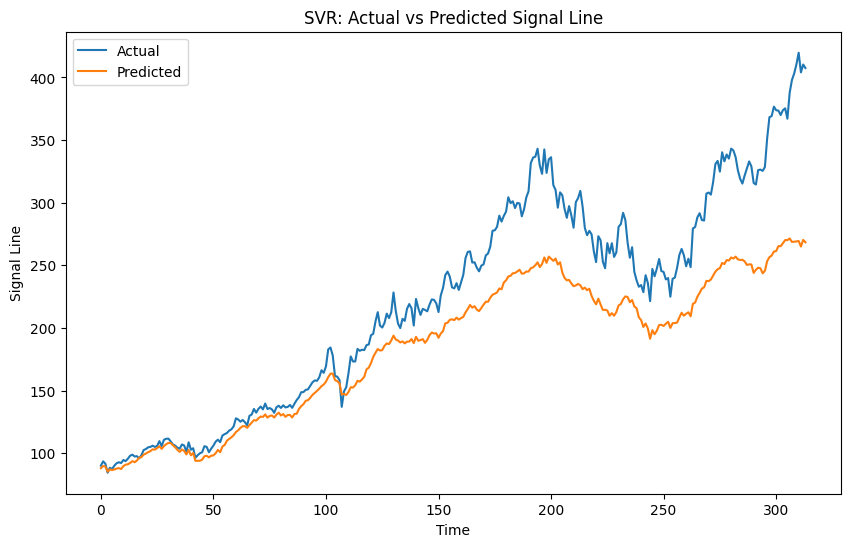

Mean Absolute Error (MAE): 36.95476890937222
Mean Squared Error (MSE): 2435.8045957080317
Root Mean Squared Error (RMSE): 49.353871131938895
R-squared (R2): 0.678628881522106


In [797]:
X = data[:, :-1]
y = data[:, -1]

#scaling
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

#svr model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)

#train model
svr_model.fit(X_train, y_train)

#predicting the trained model
y_pred_scaled = svr_model.predict(X_test)

y_pred_inv = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_actual_inv = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(y_actual_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('SVR: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

mae_svr = mean_absolute_error(y_actual_inv, y_pred_inv)
mse_svr = mean_squared_error(y_actual_inv, y_pred_inv)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_actual_inv, y_pred_inv)

print("Mean Absolute Error (MAE):", mae_svr)
print("Mean Squared Error (MSE):", mse_svr)
print("Root Mean Squared Error (RMSE):", rmse_svr)
print("R-squared (R2):", r2_svr)


## XGBoost

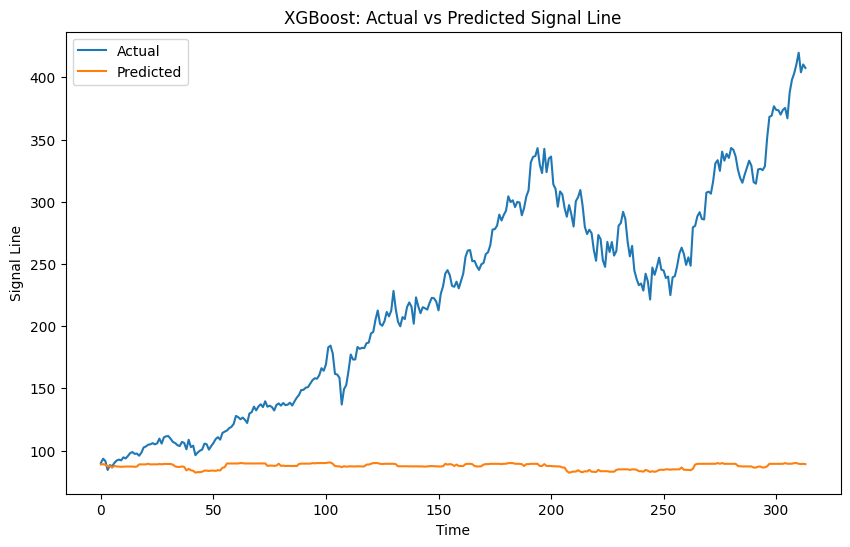

Mean Absolute Error (MAE): 134.26120910289978
Mean Squared Error (MSE): 25589.64969608076
Root Mean Squared Error (RMSE): 159.96765203028005
R-squared (R2): -2.376204461875775


In [798]:
X = data[:, :-1]
y = data[:, -1]
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

#XGBoost model
xgb_model = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)

#train model
xgb_model.fit(X_train, y_train)

#predicting the trained model
y_pred_scaled = xgb_model.predict(X_test)

y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_xgb = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred_xgb, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('XGBoost: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

mae_xgb = mean_absolute_error(y_actual, y_pred_xgb)
mse_xgb = mean_squared_error(y_actual, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_actual, y_pred_xgb)

print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared (R2):", r2_xgb)


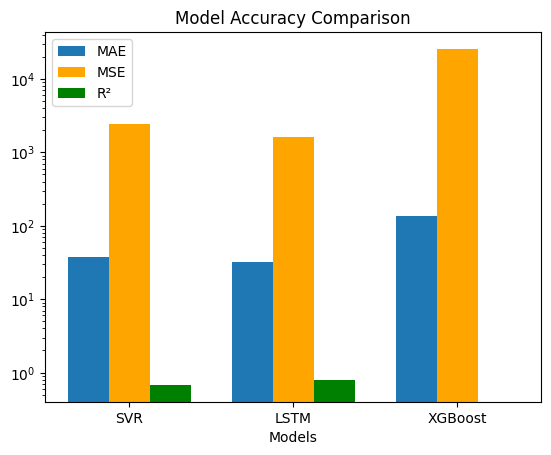

In [799]:
# Accuracy metrics for each model
accuracy_metrics = {
    'SVR': [mae_svr, mse_svr, r2_svr],
    'LSTM': [mae_lstm, mse_lstm, r2_lstm],
    'XGBoost': [mae_xgb, mse_xgb, r2_xgb]

}

labels = list(accuracy_metrics.keys())
mae_values = [metrics[0] for metrics in accuracy_metrics.values()]
mse_values = [metrics[1] for metrics in accuracy_metrics.values()]
r2_values = [metrics[2] for metrics in accuracy_metrics.values()]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, mae_values, width, label='MAE')
ax.bar(x, mse_values, width, label='MSE', color='orange')
ax.bar(x + width, r2_values, width, label='R²', color='green')

ax.set_xlabel('Models')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yscale('log')
ax.legend()
plt.show()


In [800]:
results_df = pd.DataFrame({
    'Actual Values': y_actual,
    'LSTM Predicted Values': y_pred_lstm,
    'SVR Predicted Values': y_pred_inv,
    'XGBoost Predicted Values': y_pred_xgb
})

print(results_df)

     Actual Values  LSTM Predicted Values  SVR Predicted Values  \
0        90.047424              90.424355             88.014446   
1        93.424807              91.623940             89.699629   
2        91.547408              92.258636             89.362174   
3        84.366839              90.171371             85.202983   
4        88.324861              90.798592             87.013269   
..             ...                    ...                   ...   
309     410.461000             481.273651            269.060485   
310     419.773700             488.351959            269.404025   
311     404.060000             488.796906            264.999964   
312     410.340000             489.490082            270.298821   
313     407.540000             492.411194            268.381491   

     XGBoost Predicted Values  
0                   88.823746  
1                   89.040726  
2                   88.609886  
3                   87.087891  
4                   87.640678  
.. 

In [801]:
#draw conclusions about buying or selling
decisions_lstm = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_lstm[:-1], y_actual[1:])]
decision_svr = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_inv, y_actual)]
decision_xgb = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_xgb, y_actual)]

#'print decisions
print("{:<20} {:20} {:20}".format("LSTM Decision", "SVR Decision", "XGBoost Decision"))
for i, (decision_lstm, decision_svr, decision_xgb) in enumerate(zip(decisions_lstm, decision_svr, decision_xgb)):
    print(f"Week {i+1:<3} Decision: {decision_lstm:<15} {decision_svr:<15} {decision_xgb:<15}")


LSTM Decision        SVR Decision         XGBoost Decision    
Week 1   Decision: -1              -1              -1             
Week 2   Decision: 1               -1              -1             
Week 3   Decision: 1               -1              -1             
Week 4   Decision: 1               1               1              
Week 5   Decision: 1               -1              -1             
Week 6   Decision: 1               -1              -1             
Week 7   Decision: -1              -1              -1             
Week 8   Decision: -1              -1              -1             
Week 9   Decision: 1               -1              -1             
Week 10  Decision: -1              -1              -1             
Week 11  Decision: 1               -1              -1             
Week 12  Decision: -1              -1              -1             
Week 13  Decision: -1              -1              -1             
Week 14  Decision: -1              -1              -1             

# NASDAQ

In [802]:
nasdaq = pd.read_csv("/content/Nasdaq_weekly.csv")

In [803]:
nasdaq['Date'] = pd.to_datetime(nasdaq['Date'])


In [804]:
nasdaq

,Date,Open,High,Low,Close,Volume
0,1994-03-06,785.6200,793.6000,771.8800,790.5500,0
1,1994-03-13,792.0600,795.8400,786.2300,789.2000,0
2,1994-03-20,790.0200,804.5300,789.1600,803.9300,0
3,1994-03-27,803.3900,804.0100,783.1300,783.4500,0
4,1994-04-03,784.2100,784.7900,731.7400,743.4600,0
...,...,...,...,...,...,...
1561,2024-02-04,15470.6563,15664.2119,15158.4922,15628.9541,22797304000
1562,2024-02-11,15614.0000,16007.2900,15471.6797,15990.6641,23448070000
1563,2024-02-18,15980.5996,16080.0732,15551.4443,15775.6504,25574477000
1564,2024-02-25,15730.4688,16134.2197,15451.6523,15996.8203,19646727000


In [805]:
nasdaq.isnull().sum()

Date      0
Open      2
High      2
Low       2
Close     2
Volume    0
dtype: int64

In [806]:
nasdaq.bfill(inplace=True)

In [807]:
nasdaq.drop(["Volume"], axis = 1, inplace =True)

In [808]:
nasdaq['SMA_20'] = nasdaq['Close'].rolling(window=20).mean()
nasdaq['EMA_20'] = nasdaq['Close'].ewm(span=20, adjust=False).mean()

delta = nasdaq['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
nasdaq['RSI'] = 100 - (100 / (1 + rs))

exp1 = nasdaq['Close'].ewm(span=12, adjust=False).mean()
exp2 = nasdaq['Close'].ewm(span=26, adjust=False).mean()
nasdaq['MACD'] = exp1 - exp2
cac['Signal_Line'] = nasdaq['MACD'].ewm(span=9, adjust=False).mean()
nasdaq.head(30)


,Date,Open,High,Low,Close,SMA_20,EMA_20,RSI,MACD
0,1994-03-06,785.62,793.60,771.88,790.55,NaN,790.550000,NaN,0.000000
1,1994-03-13,792.06,795.84,786.23,789.20,NaN,790.421429,NaN,-0.107692
2,1994-03-20,790.02,804.53,789.16,803.93,NaN,791.707959,NaN,0.984203
3,1994-03-27,803.39,804.01,783.13,783.45,NaN,790.921487,NaN,0.194729
4,1994-04-03,784.21,784.79,731.74,743.46,NaN,786.401345,NaN,-3.616110
5,1994-04-10,737.13,755.60,721.47,748.71,NaN,782.811693,NaN,-6.141797
6,1994-04-17,748.38,749.50,721.31,727.97,NaN,777.588675,NaN,-9.705092
7,1994-04-24,729.49,731.38,703.15,722.56,NaN,772.347849,NaN,-12.817816
8,1994-05-01,723.65,736.25,722.56,733.84,NaN,768.680435,NaN,-14.210658
9,1994-05-08,735.01,742.68,729.98,732.86,NaN,765.268965,NaN,-15.218148


In [809]:
mean_SMA_20 = nasdaq['SMA_20'].mean()
mean_RSI = nasdaq['RSI'].mean()

nasdaq['SMA_20'].fillna(mean_SMA_20, inplace=True)
nasdaq['RSI'].fillna(mean_RSI, inplace = True)
print(nasdaq)

           Date        Open        High         Low       Close        SMA_20  \
0    1994-03-06    785.6200    793.6000    771.8800    790.5500   4305.885607   
1    1994-03-13    792.0600    795.8400    786.2300    789.2000   4305.885607   
2    1994-03-20    790.0200    804.5300    789.1600    803.9300   4305.885607   
3    1994-03-27    803.3900    804.0100    783.1300    783.4500   4305.885607   
4    1994-04-03    784.2100    784.7900    731.7400    743.4600   4305.885607   
...         ...         ...         ...         ...         ...           ...   
1561 2024-02-04  15470.6563  15664.2119  15158.4922  15628.9541  14198.430855   
1562 2024-02-11  15614.0000  16007.2900  15471.6797  15990.6641  14337.373730   
1563 2024-02-18  15980.5996  16080.0732  15551.4443  15775.6504  14465.190135   
1564 2024-02-25  15730.4688  16134.2197  15451.6523  15996.8203  14593.464110   
1565 2024-03-03  16014.5000  16054.8984  15973.9043  15976.2510  14721.914940   

            EMA_20        R

In [810]:
data = nasdaq[['Open', 'High', 'Low', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Close']].values
print(data)

[[ 7.85620000e+02  7.93600000e+02  7.71880000e+02 ...  5.79422123e+01
   0.00000000e+00  7.90550000e+02]
 [ 7.92060000e+02  7.95840000e+02  7.86230000e+02 ...  5.79422123e+01
  -1.07692308e-01  7.89200000e+02]
 [ 7.90020000e+02  8.04530000e+02  7.89160000e+02 ...  5.79422123e+01
   9.84203375e-01  8.03930000e+02]
 ...
 [ 1.59805996e+04  1.60800732e+04  1.55514443e+04 ...  7.92351800e+01
   6.34435428e+02  1.57756504e+04]
 [ 1.57304688e+04  1.61342197e+04  1.54516523e+04 ...  7.85619933e+01
   6.56561521e+02  1.59968203e+04]
 [ 1.60145000e+04  1.60548984e+04  1.59739043e+04 ...  7.72048346e+01
   6.64773741e+02  1.59762510e+04]]


In [811]:
X = data[:, :-1]  # Input features (all columns except the last one)
y = data[:, -1]   # Target variable (last column)

# Scaling
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)


## LSTM

In [812]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
lstm = Sequential()
lstm.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error')

# training the model
lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, shuffle=False)

# evaluating the model
loss = lstm.evaluate(X_test, y_test)
print("Test Loss:", loss)

y_pred_scaled = lstm.predict(X_test)

# Converting the scaled values back
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_lstm = sc_y.inverse_transform(y_pred_scaled).flatten()

Epoch 1/100
40/40 - 2s - loss: 0.0033 - 2s/epoch - 47ms/step
Epoch 2/100
40/40 - 0s - loss: 0.0063 - 96ms/epoch - 2ms/step
Epoch 3/100
40/40 - 0s - loss: 0.0023 - 95ms/epoch - 2ms/step
Epoch 4/100
40/40 - 0s - loss: 0.0010 - 91ms/epoch - 2ms/step
Epoch 5/100
40/40 - 0s - loss: 3.8476e-04 - 88ms/epoch - 2ms/step
Epoch 6/100
40/40 - 0s - loss: 1.4272e-04 - 85ms/epoch - 2ms/step
Epoch 7/100
40/40 - 0s - loss: 9.0907e-05 - 93ms/epoch - 2ms/step
Epoch 8/100
40/40 - 0s - loss: 8.2770e-05 - 91ms/epoch - 2ms/step
Epoch 9/100
40/40 - 0s - loss: 8.0074e-05 - 90ms/epoch - 2ms/step
Epoch 10/100
40/40 - 0s - loss: 7.7943e-05 - 85ms/epoch - 2ms/step
Epoch 11/100
40/40 - 0s - loss: 7.5825e-05 - 86ms/epoch - 2ms/step
Epoch 12/100
40/40 - 0s - loss: 7.3895e-05 - 88ms/epoch - 2ms/step
Epoch 13/100
40/40 - 0s - loss: 7.2060e-05 - 82ms/epoch - 2ms/step
Epoch 14/100
40/40 - 0s - loss: 7.0178e-05 - 85ms/epoch - 2ms/step
Epoch 15/100
40/40 - 0s - loss: 6.8194e-05 - 89ms/epoch - 2ms/step
Epoch 16/100
40/40 - 

10/10 [==============================] - 0s 2ms/step


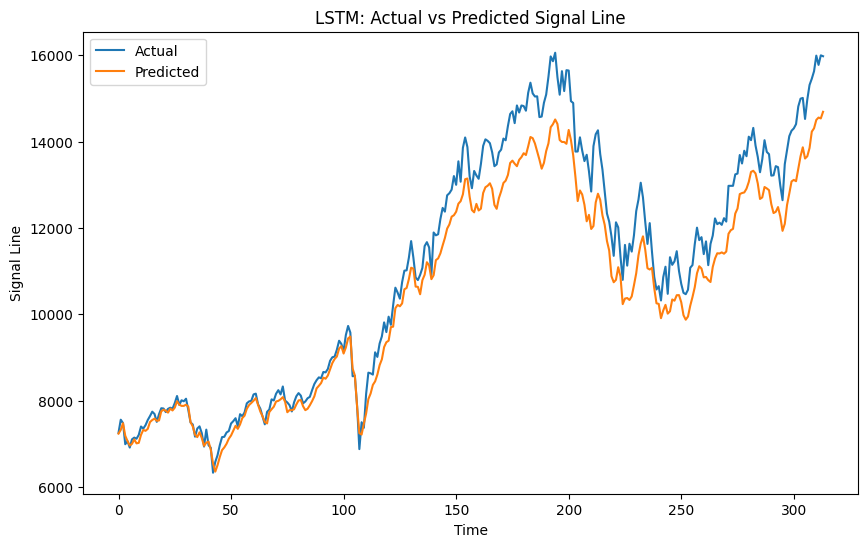

Mean Absolute Error (MAE): 621.0404518336983
Mean Squared Error (MSE): 598456.2107761835
Root Mean Squared Error (RMSE): 773.5995157548791
R-squared (R2): 0.9237646505199968


In [813]:
y_pred_scaled = lstm.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred_scaled)
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('LSTM: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

mae_lstm = mean_absolute_error(y_actual, y_pred)
mse_lstm = mean_squared_error(y_actual, y_pred)
rmse_lstm = mean_squared_error(y_actual, y_pred, squared = False)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_actual, y_pred)

print("Mean Absolute Error (MAE):", mae_lstm)
print("Mean Squared Error (MSE):", mse_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)
print("R-squared (R2):", r2_lstm)

## SVR

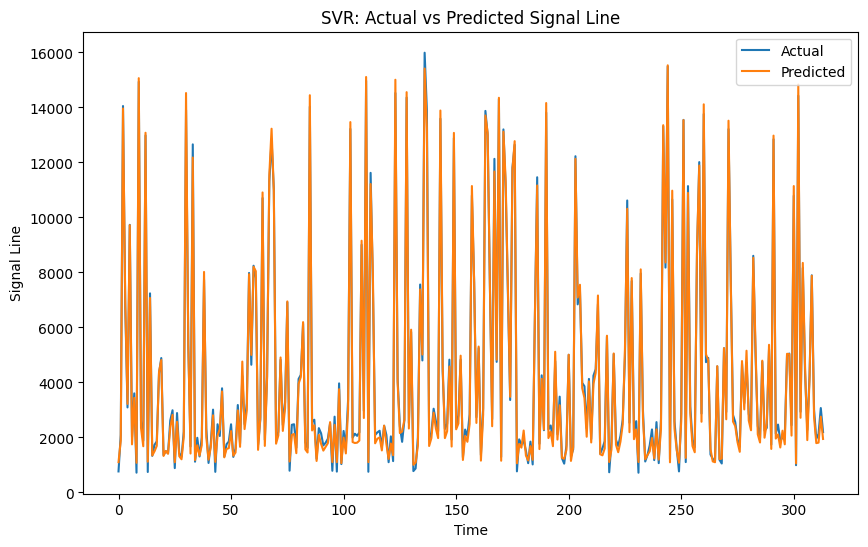

Mean Absolute Error (MAE): 203.06630673332214
Mean Squared Error (MSE): 55102.12112767482
Root Mean Squared Error (RMSE): 234.73840999647848
R-squared (R2): 0.9963880375637565


In [814]:
X = data[:, :-1]
y = data[:, -1]
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y = y.reshape(-1, 1)
y_scaled = sc_y.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=True)
#SVR model
svr = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)
svr.fit(X_train, y_train)

#predictions
y_pred = svr.predict(X_test)
y_pred_inv = sc_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('SVR: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

mae_svr = mean_absolute_error(y_actual, y_pred_inv)
mse_svr = mean_squared_error(y_actual, y_pred_inv)
rmse_svr = mean_squared_error(y_actual, y_pred_inv, squared = False)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_actual, y_pred_inv)

print("Mean Absolute Error (MAE):", mae_svr)
print("Mean Squared Error (MSE):", mse_svr)
print("Root Mean Squared Error (RMSE):", rmse_svr)
print("R-squared (R2):", r2_svr)

## XGBoost

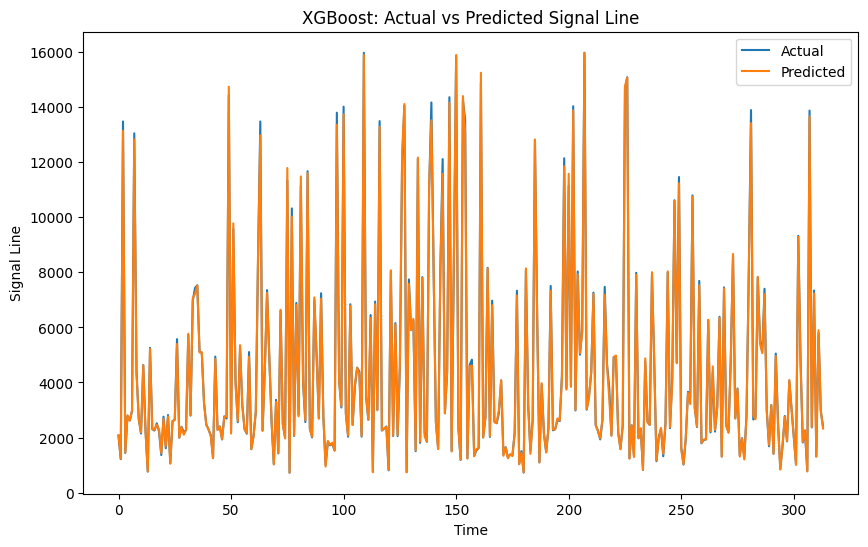

Mean Absolute Error (MAE): 68.66897660915103
Mean Squared Error (MSE): 14509.52700258234
Root Mean Squared Error (RMSE): 120.45549801724428
R-squared (R2): -1.2628687409767183


In [815]:
X = data[:, :-1]
y = data[:, -1]
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y = y.reshape(-1, 1)
y_scaled = sc_y.fit_transform(y).flatten()

#split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=True)

#XGBoost model
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_xgb = sc_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred_xgb, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('XGBoost: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

# evaluate the model with mae, mse, rmse and r2
mae_xgb = mean_absolute_error(y_actual, y_pred_xgb)
mse_xgb = mean_squared_error(y_actual, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_actual, y_pred_inv)

print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared (R2):", r2_xgb)


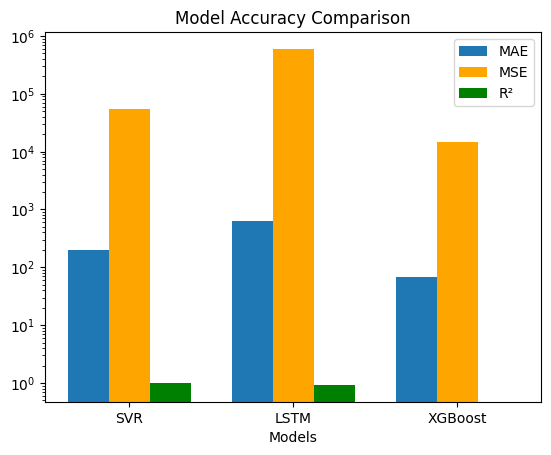

In [816]:
# Accuracy metrics for each model
accuracy_metrics = {
    'SVR': [mae_svr, mse_svr, r2_svr],
    'LSTM': [mae_lstm, mse_lstm, r2_lstm],
    'XGBoost': [mae_xgb, mse_xgb, r2_xgb]

}

labels = list(accuracy_metrics.keys())
mae_values = [metrics[0] for metrics in accuracy_metrics.values()]
mse_values = [metrics[1] for metrics in accuracy_metrics.values()]
r2_values = [metrics[2] for metrics in accuracy_metrics.values()]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, mae_values, width, label='MAE')
ax.bar(x, mse_values, width, label='MSE', color='orange')
ax.bar(x + width, r2_values, width, label='R²', color='green')

ax.set_xlabel('Models')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yscale('log')
ax.legend()

plt.show()


In [817]:
results_df = pd.DataFrame({
    'Actual Values': y_actual,
    'LSTM Predicted Values': y_pred_lstm,
    'SVR Predicted Values': y_pred_inv,
    'XGBoost Predicted Values': y_pred_xgb
})

print(results_df)

     Actual Values  LSTM Predicted Values  SVR Predicted Values  \
0          2063.00            7237.830078           1100.378885   
1          1213.18            7324.655273           1886.616388   
2         13480.11            7479.026367          13964.294527   
3          1441.23            7188.279297           6911.228202   
4          2789.80            7066.340332           3219.253075   
..             ...                    ...                   ...   
309        7337.39           14307.754883           2748.483924   
310        1311.80           14501.526367           1793.275715   
311        5805.15           14556.214844           1811.353125   
312        2951.78           14536.040039           2755.490569   
313        2402.97           14689.638672           1944.590564   

     XGBoost Predicted Values  
0                 2088.236084  
1                 1229.945923  
2                13142.097656  
3                 1456.181519  
4                 2805.146729  
.. 

In [818]:
#draw conclusions about buying or selling
decisions_lstm = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_lstm[:-1], y_actual[1:])]
decision_svr = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_inv, y_actual)]
decision_xgb = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_xgb, y_actual)]

#'print decisions
print("{:<20} {:20} {:20}".format("LSTM Decision", "SVR Decision", "XGBoost Decision"))
for i, (decision_lstm, decision_svr, decision_xgb) in enumerate(zip(decisions_lstm, decision_svr, decision_xgb)):
    print(f"Week {i+1:<3} Decision: {decision_lstm:<15} {decision_svr:<15} {decision_xgb:<15}")


LSTM Decision        SVR Decision         XGBoost Decision    
Week 1   Decision: 1               -1              1              
Week 2   Decision: -1              1               1              
Week 3   Decision: 1               1               -1             
Week 4   Decision: 1               1               1              
Week 5   Decision: 1               1               1              
Week 6   Decision: 1               1               -1             
Week 7   Decision: -1              -1              1              
Week 8   Decision: 1               -1              -1             
Week 9   Decision: 1               -1              -1             
Week 10  Decision: 1               1               -1             
Week 11  Decision: 1               1               1              
Week 12  Decision: 1               -1              -1             
Week 13  Decision: 1               1               -1             
Week 14  Decision: 1               1               1              

# sp500

In [819]:
sp500 = pd.read_csv("/content/Sp500_weekly.csv")

In [820]:
sp500['Date'] = pd.to_datetime(sp500['Date'])


In [821]:
sp500

,Date,Open,High,Low,Close,Volume
0,1994-03-06,466.0700,469.1600,457.4900,464.7400,1537910000
1,1994-03-13,464.7400,468.0700,462.4600,466.4400,1566770000
2,1994-03-20,466.4400,471.0900,465.4800,471.0600,1637710000
3,1994-03-27,471.0600,471.0600,460.5800,460.5800,1364500000
4,1994-04-03,460.5800,461.1200,436.1600,445.7700,1386810000
...,...,...,...,...,...,...
1561,2024-02-04,4892.9502,4975.2900,4845.1499,4958.6099,13788705000
1562,2024-02-11,4957.1899,5030.0601,4918.0898,5026.6099,12395813000
1563,2024-02-18,5026.8301,5048.3901,4920.3101,5005.5698,15111484340
1564,2024-02-25,4989.3200,5111.0601,4946.0000,5088.7998,14086263918


In [822]:
sp500.isnull().sum()

Date      0
Open      2
High      2
Low       2
Close     2
Volume    0
dtype: int64

In [823]:
sp500.bfill(inplace=True)

In [824]:
sp500.drop(["Volume"], axis = 1, inplace =True)

In [825]:
sp500['SMA_20'] = sp500['Close'].rolling(window=20).mean()
sp500['EMA_20'] = sp500['Close'].ewm(span=20, adjust=False).mean()

delta = sp500['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
sp500['RSI'] = 100 - (100 / (1 + rs))

exp1 = sp500['Close'].ewm(span=12, adjust=False).mean()
exp2 = sp500['Close'].ewm(span=26, adjust=False).mean()
sp500['MACD'] = exp1 - exp2
cac['Signal_Line'] = sp500['MACD'].ewm(span=9, adjust=False).mean()
sp500.head(30)


,Date,Open,High,Low,Close,SMA_20,EMA_20,RSI,MACD
0,1994-03-06,466.07,469.16,457.49,464.74,NaN,464.740000,NaN,0.000000
1,1994-03-13,464.74,468.07,462.46,466.44,NaN,464.901905,NaN,0.135613
2,1994-03-20,466.44,471.09,465.48,471.06,NaN,465.488390,NaN,0.608863
3,1994-03-27,471.06,471.06,460.58,460.58,NaN,465.020924,NaN,0.136694
4,1994-04-03,460.58,461.12,436.16,445.77,NaN,463.187503,NaN,-1.416222
5,1994-04-10,445.66,451.10,435.86,447.10,NaN,461.655360,NaN,-2.510658
6,1994-04-17,447.12,450.80,442.62,446.18,NaN,460.181516,NaN,-3.412900
7,1994-04-24,446.27,449.96,438.83,447.63,NaN,458.986134,NaN,-3.965223
8,1994-05-01,447.64,452.79,447.58,450.91,NaN,458.216978,NaN,-4.091114
9,1994-05-08,450.91,453.98,445.64,447.82,NaN,457.226790,NaN,-4.389620


In [826]:
mean_SMA_20 = sp500['SMA_20'].mean()
mean_RSI = sp500['RSI'].mean()

sp500['SMA_20'].fillna(mean_SMA_20, inplace=True)
sp500['RSI'].fillna(mean_RSI, inplace = True)
print(sp500)

           Date       Open       High        Low      Close       SMA_20  \
0    1994-03-06   466.0700   469.1600   457.4900   464.7400  1758.994303   
1    1994-03-13   464.7400   468.0700   462.4600   466.4400  1758.994303   
2    1994-03-20   466.4400   471.0900   465.4800   471.0600  1758.994303   
3    1994-03-27   471.0600   471.0600   460.5800   460.5800  1758.994303   
4    1994-04-03   460.5800   461.1200   436.1600   445.7700  1758.994303   
...         ...        ...        ...        ...        ...          ...   
1561 2024-02-04  4892.9502  4975.2900  4845.1499  4958.6099  4552.298510   
1562 2024-02-11  4957.1899  5030.0601  4918.0898  5026.6099  4587.626000   
1563 2024-02-18  5026.8301  5048.3901  4920.3101  5005.5698  4623.502000   
1564 2024-02-25  4989.3200  5111.0601  4946.0000  5088.7998  4662.516990   
1565 2024-03-03  5093.0000  5097.6602  5068.9102  5069.5298  4699.604490   

           EMA_20        RSI        MACD  
0      464.740000  57.904625    0.000000  
1

In [827]:
data = sp500[['Open', 'High', 'Low', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Close']].values
print(data)

[[4.66070000e+02 4.69160000e+02 4.57490000e+02 ... 5.79046248e+01
  0.00000000e+00 4.64740000e+02]
 [4.64740000e+02 4.68070000e+02 4.62460000e+02 ... 5.79046248e+01
  1.35612536e-01 4.66440000e+02]
 [4.66440000e+02 4.71090000e+02 4.65480000e+02 ... 5.79046248e+01
  6.08863240e-01 4.71060000e+02]
 ...
 [5.02683010e+03 5.04839010e+03 4.92031010e+03 ... 8.79589439e+01
  1.67389499e+02 5.00556980e+03]
 [4.98932000e+03 5.11106010e+03 4.94600000e+03 ... 8.77132402e+01
  1.77086268e+02 5.08879980e+03]
 [5.09300000e+03 5.09766020e+03 5.06891020e+03 ... 8.46601177e+01
  1.81128166e+02 5.06952980e+03]]


In [828]:
X = data[:, :-1]
y = data[:, -1]
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)


## LSTM

In [829]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
lstm = Sequential()
lstm.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error')

# training the model
lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, shuffle=False)

# evaluating the model
loss = lstm.evaluate(X_test, y_test)
print("Test Loss:", loss)

y_pred_scaled = lstm.predict(X_test)

# Converting the scaled values back
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_lstm = sc_y.inverse_transform(y_pred_scaled).flatten()

Epoch 1/100
40/40 - 3s - loss: 0.0054 - 3s/epoch - 83ms/step
Epoch 2/100
40/40 - 0s - loss: 0.0072 - 100ms/epoch - 2ms/step
Epoch 3/100
40/40 - 0s - loss: 0.0026 - 98ms/epoch - 2ms/step
Epoch 4/100
40/40 - 0s - loss: 0.0011 - 90ms/epoch - 2ms/step
Epoch 5/100
40/40 - 0s - loss: 4.2011e-04 - 92ms/epoch - 2ms/step
Epoch 6/100
40/40 - 0s - loss: 1.9031e-04 - 92ms/epoch - 2ms/step
Epoch 7/100
40/40 - 0s - loss: 1.6000e-04 - 95ms/epoch - 2ms/step
Epoch 8/100
40/40 - 0s - loss: 1.6204e-04 - 98ms/epoch - 2ms/step
Epoch 9/100
40/40 - 0s - loss: 1.6263e-04 - 89ms/epoch - 2ms/step
Epoch 10/100
40/40 - 0s - loss: 1.6014e-04 - 94ms/epoch - 2ms/step
Epoch 11/100
40/40 - 0s - loss: 1.5595e-04 - 96ms/epoch - 2ms/step
Epoch 12/100
40/40 - 0s - loss: 1.5101e-04 - 93ms/epoch - 2ms/step
Epoch 13/100
40/40 - 0s - loss: 1.4551e-04 - 93ms/epoch - 2ms/step
Epoch 14/100
40/40 - 0s - loss: 1.3955e-04 - 96ms/epoch - 2ms/step
Epoch 15/100
40/40 - 0s - loss: 1.3329e-04 - 96ms/epoch - 2ms/step
Epoch 16/100
40/40 -

10/10 [==============================] - 0s 2ms/step


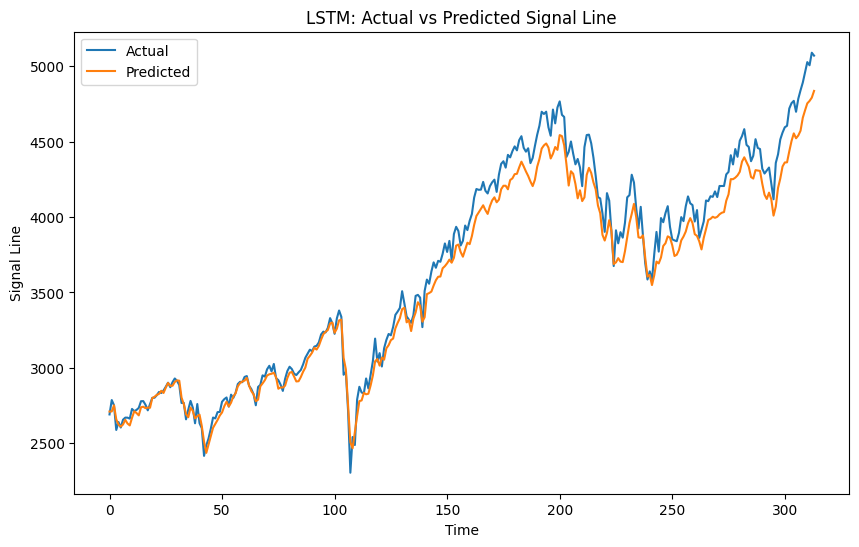

Mean Absolute Error (MAE): 103.81095852906051
Mean Squared Error (MSE): 16949.562685643214
Root Mean Squared Error (RMSE): 130.1904861564132
R-squared (R2): 0.966666459002195


In [830]:
y_pred_scaled = lstm.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred_scaled)
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('LSTM: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

mae_lstm = mean_absolute_error(y_actual, y_pred)
mse_lstm = mean_squared_error(y_actual, y_pred)
rmse_lstm = mean_squared_error(y_actual, y_pred, squared = False)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_actual, y_pred)

print("Mean Absolute Error (MAE):", mae_lstm)
print("Mean Squared Error (MSE):", mse_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)
print("R-squared (R2):", r2_lstm)

## SVR

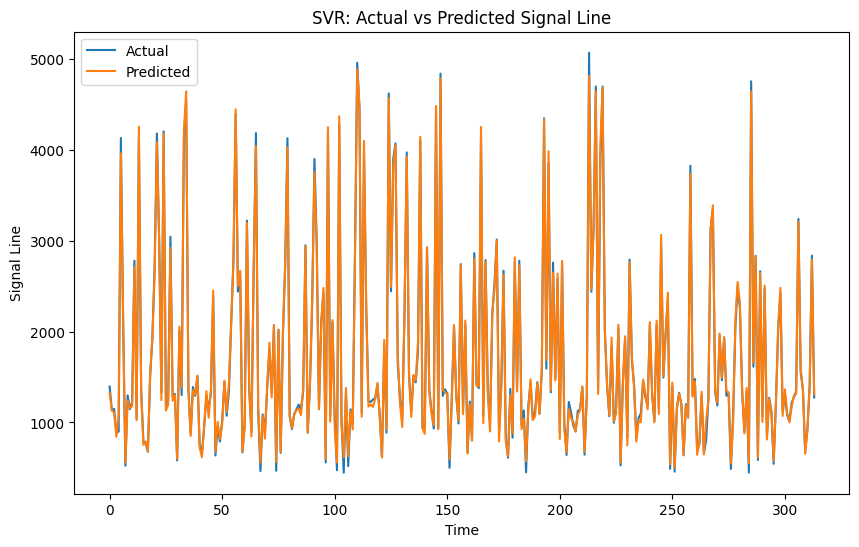

Mean Absolute Error (MAE): 44.50866028790441
Mean Squared Error (MSE): 3348.4584068926215
Root Mean Squared Error (RMSE): 57.865865645409826
R-squared (R2): 0.9970861692950821


In [831]:
X = data[:, :-1]
y = data[:, -1]
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y = y.reshape(-1, 1)
y_scaled = sc_y.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=True)
#SVR model
svr = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)
svr.fit(X_train, y_train)

#predictions
y_pred = svr.predict(X_test)
y_pred_inv = sc_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('SVR: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

mae_svr = mean_absolute_error(y_actual, y_pred_inv)
mse_svr = mean_squared_error(y_actual, y_pred_inv)
rmse_svr = mean_squared_error(y_actual, y_pred_inv, squared = False)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_actual, y_pred_inv)

print("Mean Absolute Error (MAE):", mae_svr)
print("Mean Squared Error (MSE):", mse_svr)
print("Root Mean Squared Error (RMSE):", rmse_svr)
print("R-squared (R2):", r2_svr)

## XGBoost

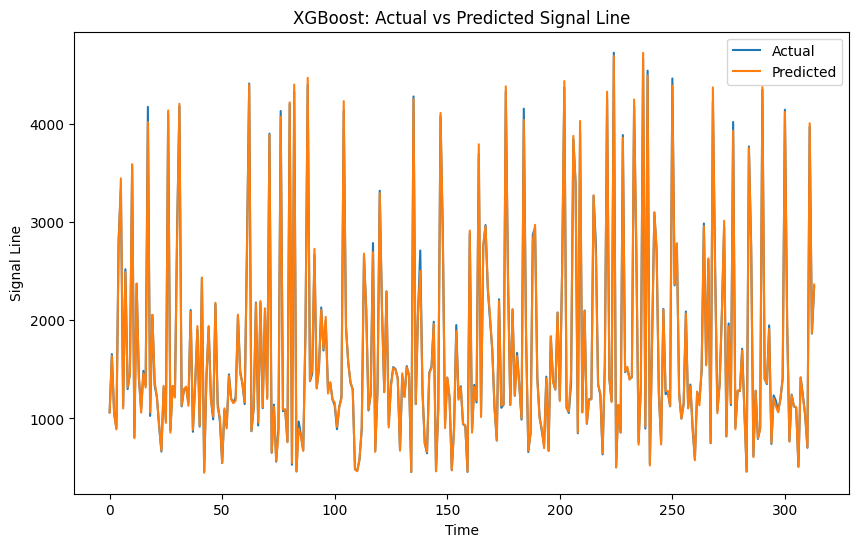

Mean Absolute Error (MAE): 21.310315411493576
Mean Squared Error (MSE): 1137.3548939909565
Root Mean Squared Error (RMSE): 33.72469264487012
R-squared (R2): -1.282204996523423


In [832]:
X = data[:, :-1]
y = data[:, -1]

sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)

y = y.reshape(-1, 1)
y_scaled = sc_y.fit_transform(y).flatten()

#split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=True)

#XGBoost model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_xgb = sc_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_actual = sc_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred_xgb, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Signal Line')
plt.title('XGBoost: Actual vs Predicted Signal Line')
plt.legend()
plt.show()

# evaluate the model with mae, mse, rmse and r2
mae_xgb = mean_absolute_error(y_actual, y_pred_xgb)
mse_xgb = mean_squared_error(y_actual, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_actual, y_pred_inv)

print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared (R2):", r2_xgb)


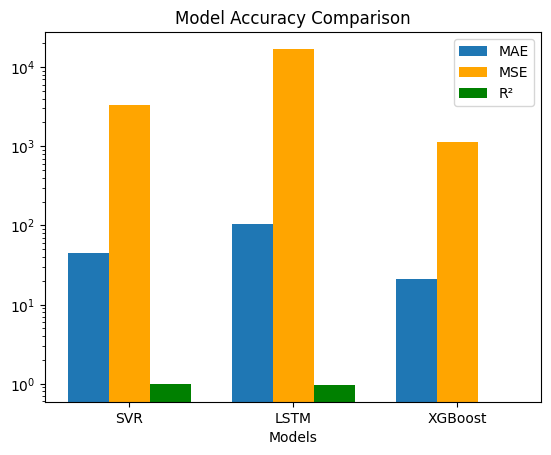

In [833]:
# Accuracy metrics for each model
accuracy_metrics = {
    'SVR': [mae_svr, mse_svr, r2_svr],
    'LSTM': [mae_lstm, mse_lstm, r2_lstm],
    'XGBoost': [mae_xgb, mse_xgb, r2_xgb]

}

labels = list(accuracy_metrics.keys())
mae_values = [metrics[0] for metrics in accuracy_metrics.values()]
mse_values = [metrics[1] for metrics in accuracy_metrics.values()]
r2_values = [metrics[2] for metrics in accuracy_metrics.values()]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, mae_values, width, label='MAE')
ax.bar(x, mse_values, width, label='MSE', color='orange')
ax.bar(x + width, r2_values, width, label='R²', color='green')

ax.set_xlabel('Models')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yscale('log')
ax.legend()
plt.show()


In [834]:
results_df = pd.DataFrame({
    'Actual Values': y_actual,
    'LSTM Predicted Values': y_pred_lstm,
    'SVR Predicted Values': y_pred_inv,
    'XGBoost Predicted Values': y_pred_xgb
})

print(results_df)

     Actual Values  LSTM Predicted Values  SVR Predicted Values  \
0        1064.5900            2710.576660           1323.507944   
1        1655.1700            2711.075684           1129.061723   
2        1055.6899            2751.562012           1111.410101   
3         898.7000            2658.895264            842.366014   
4        2836.7400            2623.707520           1077.088696   
..             ...                    ...                   ...   
309      1028.9100            4706.851562            654.553863   
310       700.9200            4753.241211            917.245561   
311      3972.6101            4769.166504           1411.190046   
312      1863.4000            4791.026367           2791.745756   
313      2343.9800            4835.539551           1309.703969   

     XGBoost Predicted Values  
0                 1057.806763  
1                 1636.353882  
2                 1046.472290  
3                  888.247131  
4                 2753.790527  
.. 

In [835]:
#draw conclusions about buying or selling
decision_lstm = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_lstm[:-1], y_actual[1:])]
decision_svr = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_inv, y_actual)]
decision_xgb = ['1' if pred > actual else '-1' for pred, actual in zip(y_pred_xgb, y_actual)]

#'print decisions
print("{:<20} {:20} {:20}".format("LSTM Decision", "SVR Decision", "XGBoost Decision"))
for i, (decision_lstm, decision_svr, decision_xgb) in enumerate(zip(decision_lstm, decision_svr, decision_xgb)):
    print(f"Week {i+1:<3} Decision: {decision_lstm:<15} {decision_svr:<15} {decision_xgb:<15}")


LSTM Decision        SVR Decision         XGBoost Decision    
Week 1   Decision: 1               1               -1             
Week 2   Decision: 1               -1              -1             
Week 3   Decision: 1               1               -1             
Week 4   Decision: -1              -1              -1             
Week 5   Decision: -1              -1              -1             
Week 6   Decision: 1               1               1              
Week 7   Decision: 1               1               -1             
Week 8   Decision: 1               -1              -1             
Week 9   Decision: 1               -1              1              
Week 10  Decision: -1              -1              1              
Week 11  Decision: 1               -1              1              
Week 12  Decision: 1               1               -1             
Week 13  Decision: 1               -1              -1             
Week 14  Decision: 1               1               1              